In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import spearmanr
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
import plotly.io as pio
pio.renderers.default='notebook'

In [3]:
df = pd.read_csv(os.path.join('female_dataset.csv'))
df = df.drop_duplicates().set_index('ID_REF')
df.head()

,GSM1350859,GSM1350861,GSM1350862,GSM1350863,GSM1350864,GSM1350867,GSM1350870,GSM1350871,GSM1350874,GSM1350876,...,GSM755468,GSM755472,GSM755474,GSM755475,GSM755476,GSM755478,GSM755481,GSM755482,GSM755484,GSM755485
ID_REF,,,,,,,,,,,,,,,,,,,,,
AAAS,543.951306,432.065194,411.710653,361.005942,303.413139,299.067921,439.168738,345.125297,310.998697,277.180459,...,415.780557,394.666494,413.079180,448.082397,391.181463,397.336015,459.881807,437.780212,394.883114,434.435347
ABCB6,90.970169,97.332480,92.056579,97.214265,87.342064,89.745593,98.477452,93.475298,88.792312,95.786761,...,91.117796,94.628753,90.862561,92.963254,93.209080,92.469250,91.367151,92.626861,91.738830,95.234496
ABCC5,88.974578,152.413893,142.404538,127.871100,127.097393,116.856200,103.247095,111.165612,119.360597,127.807630,...,151.462413,147.200495,145.464158,163.770862,148.812808,144.201368,158.050722,139.417046,149.402862,149.650910
ABCC9,29.452756,27.847905,30.194220,29.056383,28.222821,28.073283,28.002311,27.479846,30.138180,30.421736,...,28.888057,29.093726,29.726556,28.872236,28.872236,28.517852,28.040065,28.770983,28.989310,28.726685
ABCE1,134.278846,434.739165,422.700544,374.849451,219.291095,507.105225,298.458079,391.376405,216.399611,393.277116,...,399.896469,236.333891,352.051126,437.596294,307.745863,329.610269,445.551303,401.632600,369.988891,354.831649


In [4]:
df_all_annot = pd.read_csv(os.path.join('meta_data_correct.csv'))
df_all_annot = df_all_annot.drop_duplicates().set_index('GSM')
df_all_annot.head()

,Unnamed: 0,GSE,age,sex
GSM,,,,
GSM418770,1,GSE16717,91,F
GSM418771,2,GSE16717,56,F
GSM418772,3,GSE16717,91,M
GSM418773,4,GSE16717,52,M
GSM418774,5,GSE16717,64,F


In [5]:
subdf = df_all_annot[['age']].join(df[:'AAAS'])
# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(subdf['age'], subdf['AAAS'], color='skyblue')
plt.title('Scatter Plot of Age vs cg00295572')
plt.xlabel('Age')
plt.ylabel('AAAS')
plt.grid(True)
plt.show()

KeyError: 'AAAS'

<Figure size 800x600 with 0 Axes>

In [6]:
subdf_idx = subdf_idx.drop(dupls_in_df)
subdf_annot = subdf_annot.loc[subdf_idx]
subdf = subdf.loc[subdf_idx]
len(subdf) == len(subdf_annot)

NameError: name 'subdf_idx' is not defined

In [7]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from concurrent.futures import ProcessPoolExecutor

In [8]:
subdf.columns

Index(['age', 'GSM1350859', 'GSM1350861', 'GSM1350862', 'GSM1350863',
       'GSM1350864', 'GSM1350867', 'GSM1350870', 'GSM1350871', 'GSM1350874',
       ...
       'GSM755468', 'GSM755472', 'GSM755474', 'GSM755475', 'GSM755476',
       'GSM755478', 'GSM755481', 'GSM755482', 'GSM755484', 'GSM755485'],
      dtype='object', length=449)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster import hierarchy

In [10]:
df = df.T

In [11]:
df.head(2)

ID_REF,AAAS,ABCB6,ABCC5,ABCC9,ABCE1,ABHD12,ABHD2,ABHD5,ABI1,ACAD8,...,ZNF683,ZNF691,ZNF705A,ZNF707,ZNF713,ZNF746,ZNF786,ZSCAN29,ZWILCH,ZZZ3
GSM1350859,543.951306,90.970169,88.974578,29.452756,134.278846,357.372209,326.182191,163.542156,315.472464,227.490666,...,148.413825,117.067328,17.308169,162.869683,40.962443,561.644105,416.45963,83.471071,97.300331,174.966022
GSM1350861,432.065194,97.332480,152.413893,27.847905,434.739165,286.561504,408.307560,175.863364,552.875236,226.129229,...,135.442857,86.560273,19.159325,96.354368,48.420898,465.907755,424.54238,148.088391,117.731853,431.779193


In [12]:
subdf_idx = df_all_annot.index

In [13]:
idx_in_df = list(df.index)
dupls_in_df = list(set(n for n in idx_in_df if idx_in_df.count(n) > 1))
df.loc[dupls_in_df]

ID_REF,AAAS,ABCB6,ABCC5,ABCC9,ABCE1,ABHD12,ABHD2,ABHD5,ABI1,ACAD8,...,ZNF683,ZNF691,ZNF705A,ZNF707,ZNF713,ZNF746,ZNF786,ZSCAN29,ZWILCH,ZZZ3


In [14]:
df_all_annot

,Unnamed: 0,GSE,age,sex
GSM,,,,
GSM418770,1,GSE16717,91,F
GSM418771,2,GSE16717,56,F
GSM418772,3,GSE16717,91,M
GSM418773,4,GSE16717,52,M
GSM418774,5,GSE16717,64,F
...,...,...,...,...
GSM1611030,4584,GSE65907,72,M
GSM1611031,4585,GSE65907,67,F
GSM1611032,4586,GSE65907,49,M


In [15]:
df_all_annot = df_all_annot.loc[subdf_idx]
df = df.loc[subdf_idx]
len(df) == len(df_all_annot)

KeyError: '[\'GSM418770\', \'GSM418771\', \'GSM418772\', \'GSM418773\', \'GSM418774\', \'GSM418775\', \'GSM418776\', \'GSM418777\', \'GSM418778\', \'GSM418779\', \'GSM418780\', \'GSM418781\', \'GSM418782\', \'GSM418783\', \'GSM418784\', \'GSM418785\', \'GSM418786\', \'GSM418787\', \'GSM418788\', \'GSM418789\', \'GSM418790\', \'GSM418791\', \'GSM418792\', \'GSM418793\', \'GSM418794\', \'GSM418795\', \'GSM418796\', \'GSM418797\', \'GSM418798\', \'GSM418799\', \'GSM418800\', \'GSM418801\', \'GSM418802\', \'GSM418803\', \'GSM418804\', \'GSM418805\', \'GSM418806\', \'GSM418807\', \'GSM418808\', \'GSM418809\', \'GSM418810\', \'GSM418811\', \'GSM418812\', \'GSM418813\', \'GSM418814\', \'GSM418815\', \'GSM418816\', \'GSM418817\', \'GSM418818\', \'GSM418819\', \'GSM418820\', \'GSM418821\', \'GSM418822\', \'GSM418823\', \'GSM418824\', \'GSM418825\', \'GSM418826\', \'GSM418827\', \'GSM418828\', \'GSM418829\', \'GSM418830\', \'GSM418831\', \'GSM418832\', \'GSM418833\', \'GSM418834\', \'GSM418835\', \'GSM418836\', \'GSM418837\', \'GSM418838\', \'GSM418839\', \'GSM418840\', \'GSM418841\', \'GSM418842\', \'GSM418843\', \'GSM418844\', \'GSM418845\', \'GSM418846\', \'GSM418847\', \'GSM418848\', \'GSM418849\', \'GSM418850\', \'GSM418851\', \'GSM418852\', \'GSM418853\', \'GSM418854\', \'GSM418855\', \'GSM418856\', \'GSM418857\', \'GSM418858\', \'GSM418859\', \'GSM418860\', \'GSM418861\', \'GSM418862\', \'GSM418863\', \'GSM418864\', \'GSM418865\', \'GSM418866\', \'GSM418867\', \'GSM418868\', \'GSM418869\', \'GSM418870\', \'GSM418871\', \'GSM418872\', \'GSM418873\', \'GSM418874\', \'GSM418875\', \'GSM418876\', \'GSM418877\', \'GSM418878\', \'GSM418879\', \'GSM418880\', \'GSM418881\', \'GSM418882\', \'GSM418883\', \'GSM418884\', \'GSM418885\', \'GSM418886\', \'GSM418887\', \'GSM418888\', \'GSM418889\', \'GSM418890\', \'GSM418891\', \'GSM418892\', \'GSM418893\', \'GSM418894\', \'GSM418895\', \'GSM418896\', \'GSM418897\', \'GSM418898\', \'GSM418899\', \'GSM418900\', \'GSM418901\', \'GSM418902\', \'GSM418903\', \'GSM418904\', \'GSM418905\', \'GSM418906\', \'GSM418907\', \'GSM418908\', \'GSM418909\', \'GSM418910\', \'GSM418911\', \'GSM418912\', \'GSM418913\', \'GSM418914\', \'GSM418915\', \'GSM418916\', \'GSM418917\', \'GSM418918\', \'GSM418919\', \'""GSM1642604""\', \'""GSM1642605""\', \'""GSM1642606""\', \'""GSM1642607""\', \'""GSM1642608""\', \'""GSM1642609""\', \'""GSM1642610""\', \'""GSM1642611""\', \'""GSM1642612""\', \'""GSM1642613""\', \'""GSM1642614""\', \'""GSM1642615""\', \'""GSM1642616""\', \'""GSM1642617""\', \'""GSM1642618""\', \'""GSM1642619""\', \'""GSM1642620""\', \'""GSM1642621""\', \'""GSM1642622""\', \'""GSM1642623""\', \'GSM1350856\', \'GSM1350857\', \'GSM1350858\', \'GSM1350860\', \'GSM1350865\', \'GSM1350866\', \'GSM1350868\', \'GSM1350869\', \'GSM1350872\', \'GSM1350873\', \'GSM1350875\', \'GSM1350880\', \'GSM1350881\', \'GSM1350883\', \'GSM1350884\', \'GSM1350885\', \'GSM1350888\', \'GSM1350889\', \'GSM1350890\', \'GSM1350891\', \'GSM1350892\', \'GSM1350893\', \'GSM1350895\', \'GSM1350897\', \'GSM1350899\', \'GSM1350902\', \'GSM1350904\', \'GSM1350905\', \'GSM1350909\', \'GSM1350916\', \'GSM1350920\', \'GSM1350923\', \'GSM1350924\', \'GSM1350930\', \'GSM1350931\', \'GSM1350937\', \'GSM1350938\', \'GSM1350946\', \'GSM1350947\', \'GSM1350949\', \'GSM1350950\', \'GSM1350951\', \'GSM1350952\', \'GSM1350953\', \'GSM1350955\', \'GSM1350956\', \'GSM1350957\', \'GSM1350963\', \'GSM1350964\', \'GSM1350969\', \'GSM1350971\', \'GSM1350973\', \'GSM1350977\', \'GSM1350979\', \'GSM1350981\', \'GSM1350982\', \'GSM1350986\', \'GSM1350988\', \'GSM1350989\', \'GSM1350990\', \'GSM1350998\', \'GSM1350999\', \'GSM1351000\', \'GSM1351001\', \'GSM1351003\', \'GSM1351004\', \'GSM1351005\', \'GSM1351006\', \'GSM1351010\', \'GSM1351015\', \'GSM1351017\', \'GSM1351018\', \'GSM1351020\', \'GSM1351021\', \'GSM1351022\', \'GSM1351023\', \'GSM1351028\', \'GSM1351029\', \'GSM1351033\', \'GSM1351034\', \'GSM1351035\', \'GSM1351039\', \'GSM1351041\', \'GSM1351043\', \'GSM1351044\', \'GSM1351046\', \'GSM1351049\', \'GSM1351051\', \'GSM1351052\', \'GSM1351054\', \'GSM1351056\', \'GSM1351061\', \'GSM1351064\', \'GSM1351067\', \'GSM1351072\', \'GSM1351073\', \'GSM1351076\', \'GSM1351078\', \'GSM1351079\', \'GSM1351084\', \'GSM1351088\', \'GSM1351092\', \'GSM1351093\', \'GSM1351097\', \'GSM1351098\', \'GSM1351099\', \'GSM1351100\', \'GSM1351102\', \'GSM1351106\', \'GSM1351107\', \'GSM1351108\', \'GSM1351110\', \'GSM1351116\', \'GSM1351120\', \'GSM1351122\', \'GSM1351128\', \'GSM1351136\', \'GSM1351137\', \'GSM1351142\', \'GSM1351144\', \'GSM1351146\', \'GSM1351149\', \'GSM1351152\', \'GSM1351159\', \'GSM1351162\', \'GSM1351164\', \'GSM1351165\', \'GSM1351166\', \'GSM1351167\', \'GSM1351168\', \'GSM1351173\', \'GSM1351175\', \'GSM1351176\', \'GSM1351179\', \'GSM1351183\', \'GSM1351184\', \'GSM1351189\', \'GSM1351190\', \'GSM1351191\', \'GSM1351192\', \'GSM1351199\', \'GSM1351202\', \'GSM1351204\', \'GSM1351205\', \'GSM1351214\', \'GSM1351215\', \'GSM1351216\', \'GSM1351217\', \'GSM1351218\', \'GSM1351226\', \'GSM1351227\', \'GSM1351232\', \'GSM1351234\', \'GSM1351235\', \'GSM1351237\', \'GSM1351240\', \'GSM1351242\', \'GSM1351243\', \'GSM1351246\', \'GSM1351247\', \'GSM1351248\', \'GSM1351252\', \'GSM1351256\', \'GSM1351257\', \'GSM1351261\', \'GSM1351264\', \'GSM1351266\', \'GSM1351267\', \'GSM1351268\', \'GSM1351270\', \'GSM1351271\', \'GSM1351272\', \'GSM1351275\', \'GSM1351277\', \'GSM1351280\', \'GSM1351281\', \'GSM1351283\', \'GSM1351285\', \'GSM1351286\', \'GSM1351290\', \'GSM1351293\', \'GSM1351295\', \'GSM1351297\', \'GSM1351298\', \'GSM1351301\', \'GSM1351303\', \'GSM1355819\', \'GSM1355820\', \'GSM1355821\', \'GSM1355822\', \'GSM1355824\', \'GSM1355829\', \'GSM1355831\', \'GSM1355839\', \'GSM1355840\', \'GSM1355842\', \'GSM1355846\', \'GSM1355847\', \'GSM1355851\', \'GSM1355852\', \'GSM1355855\', \'GSM1355856\', \'GSM1355857\', \'GSM1355858\', \'GSM1355859\', \'GSM1355860\', \'GSM1355863\', \'GSM1352002\', \'GSM1352003\', \'GSM1352004\', \'GSM1352005\', \'GSM1352006\', \'GSM1352007\', \'GSM1352008\', \'GSM1352009\', \'GSM1352010\', \'GSM1352011\', \'GSM1352012\', \'GSM1352013\', \'GSM1352014\', \'GSM1352015\', \'GSM1352016\', \'GSM1352017\', \'GSM1352018\', \'GSM1352019\', \'GSM1352020\', \'GSM1352021\', \'GSM1352022\', \'GSM1352023\', \'GSM1352024\', \'GSM1352025\', \'GSM1352026\', \'GSM1352027\', \'GSM1352028\', \'GSM1352029\', \'GSM1352030\', \'GSM1352031\', \'GSM1352032\', \'GSM1352033\', \'GSM1352034\', \'GSM1352035\', \'GSM1352036\', \'GSM1352037\', \'GSM1352038\', \'GSM1352039\', \'GSM1352040\', \'GSM1352041\', \'GSM1352042\', \'GSM1352043\', \'GSM1352044\', \'GSM1352045\', \'GSM1352046\', \'GSM1352047\', \'GSM1352048\', \'GSM1352049\', \'GSM1352050\', \'GSM1352051\', \'GSM1352052\', \'GSM1352053\', \'GSM1352054\', \'GSM1352055\', \'GSM1352056\', \'GSM1352057\', \'GSM1352058\', \'GSM1352059\', \'GSM1352060\', \'GSM1352061\', \'GSM1352062\', \'GSM1352063\', \'GSM1352064\', \'GSM1352065\', \'GSM1352066\', \'GSM1352067\', \'GSM1352068\', \'GSM1352069\', \'GSM1352070\', \'GSM1352071\', \'GSM1352072\', \'GSM1352073\', \'GSM1352074\', \'GSM1352075\', \'GSM1352076\', \'GSM1352077\', \'GSM1352078\', \'GSM1352079\', \'GSM1352080\', \'GSM1352081\', \'GSM1352082\', \'GSM1352083\', \'GSM1352084\', \'GSM1352085\', \'GSM1352086\', \'GSM1352087\', \'GSM1352088\', \'GSM1352089\', \'GSM1352090\', \'GSM1352091\', \'GSM1352092\', \'GSM1352093\', \'GSM1352094\', \'GSM1352095\', \'GSM1352096\', \'GSM1352097\', \'GSM1352098\', \'GSM1352099\', \'GSM1352100\', \'GSM1352101\', \'GSM1352102\', \'GSM1352103\', \'GSM1352104\', \'GSM1352105\', \'GSM1352106\', \'GSM1352107\', \'GSM1352108\', \'GSM1352109\', \'GSM1352110\', \'GSM1352111\', \'GSM1352112\', \'GSM1352113\', \'GSM1352114\', \'GSM1352115\', \'GSM1352116\', \'GSM1352117\', \'GSM1352118\', \'GSM1352119\', \'GSM1352120\', \'GSM1352121\', \'GSM1352122\', \'GSM1352123\', \'GSM1352124\', \'GSM1352125\', \'GSM1352126\', \'GSM1352127\', \'GSM1352128\', \'GSM1352129\', \'GSM1352130\', \'GSM1352131\', \'GSM1352132\', \'GSM1352133\', \'GSM1352134\', \'GSM1352135\', \'GSM1352136\', \'GSM1352137\', \'GSM1352138\', \'GSM1352139\', \'GSM1352140\', \'GSM1352141\', \'GSM1352142\', \'GSM1352143\', \'GSM1352144\', \'GSM1352145\', \'GSM1352146\', \'GSM1352147\', \'GSM1352148\', \'GSM1352149\', \'GSM1352150\', \'GSM1352151\', \'GSM1352152\', \'GSM1352153\', \'GSM1352154\', \'GSM1352155\', \'GSM1352156\', \'GSM1352157\', \'GSM1352158\', \'GSM1352159\', \'GSM1352160\', \'GSM1352161\', \'GSM1352162\', \'GSM1352163\', \'GSM1352164\', \'GSM1352165\', \'GSM1352166\', \'GSM1352167\', \'GSM1352168\', \'GSM1352169\', \'GSM1352170\', \'GSM1352171\', \'GSM1352172\', \'GSM1352173\', \'GSM1352174\', \'GSM1352175\', \'GSM1352176\', \'GSM1352177\', \'GSM1352178\', \'GSM1352179\', \'GSM1352180\', \'GSM1352181\', \'GSM1352182\', \'GSM1352183\', \'GSM1352184\', \'GSM1352185\', \'GSM1352186\', \'GSM1352187\', \'GSM1352188\', \'GSM1352189\', \'GSM1352190\', \'GSM1352191\', \'GSM1352192\', \'GSM1352193\', \'GSM1352194\', \'GSM1352195\', \'GSM1352196\', \'GSM1352197\', \'GSM1352198\', \'GSM1352199\', \'GSM1352200\', \'GSM1352201\', \'GSM1352202\', \'GSM1352203\', \'GSM1352204\', \'GSM1352205\', \'GSM1352206\', \'GSM1352207\', \'GSM1352208\', \'GSM1352209\', \'GSM1352210\', \'GSM1352211\', \'GSM1352212\', \'GSM1352213\', \'GSM1352214\', \'GSM1352215\', \'GSM1352216\', \'GSM1352217\', \'GSM1352218\', \'GSM1352219\', \'GSM1352220\', \'GSM1352221\', \'GSM1352222\', \'GSM1352223\', \'GSM1352224\', \'GSM1352225\', \'GSM1352226\', \'GSM1352227\', \'GSM1352228\', \'GSM1352229\', \'GSM1352230\', \'GSM1352231\', \'GSM1352232\', \'GSM1352233\', \'GSM1352234\', \'GSM1352235\', \'GSM1352236\', \'GSM1352237\', \'GSM1352238\', \'GSM1352239\', \'GSM1352240\', \'GSM1352241\', \'GSM1352242\', \'GSM1352243\', \'GSM1352244\', \'GSM1352245\', \'GSM1352246\', \'GSM1352247\', \'GSM1352248\', \'GSM1352249\', \'GSM1352250\', \'GSM1352251\', \'GSM1352252\', \'GSM1352253\', \'GSM1352254\', \'GSM1352255\', \'GSM1352256\', \'GSM1352257\', \'GSM1352258\', \'GSM1352259\', \'GSM1352260\', \'GSM1352261\', \'GSM1352262\', \'GSM1352263\', \'GSM1352264\', \'GSM1352265\', \'GSM1352266\', \'GSM1352267\', \'GSM1352268\', \'GSM1352269\', \'GSM1352270\', \'GSM1352271\', \'GSM1352272\', \'GSM1352273\', \'GSM1352274\', \'GSM1352275\', \'GSM1352276\', \'GSM1352277\', \'GSM1352278\', \'GSM1352279\', \'GSM1352280\', \'GSM1352281\', \'GSM1352282\', \'GSM1352283\', \'GSM1352284\', \'GSM1352285\', \'GSM1352286\', \'GSM1352287\', \'GSM1352288\', \'GSM1352289\', \'GSM1352290\', \'GSM1352291\', \'GSM1352292\', \'GSM1352293\', \'GSM1352294\', \'GSM1352295\', \'GSM1352296\', \'GSM1352297\', \'GSM1352298\', \'GSM1352299\', \'GSM1352300\', \'GSM1352301\', \'GSM1352302\', \'GSM1352303\', \'GSM1352304\', \'GSM1352305\', \'GSM1352306\', \'GSM1352307\', \'GSM1352308\', \'GSM1352309\', \'GSM1352310\', \'GSM1352311\', \'GSM1352312\', \'GSM1352313\', \'GSM1352314\', \'GSM1352315\', \'GSM1352316\', \'GSM1352317\', \'GSM1352318\', \'GSM1352319\', \'GSM1352320\', \'GSM1352321\', \'GSM1352322\', \'GSM1352323\', \'GSM1352324\', \'GSM1352325\', \'GSM1352326\', \'GSM1352327\', \'GSM1352328\', \'GSM1352329\', \'GSM1352330\', \'GSM1352331\', \'GSM1352332\', \'GSM1352333\', \'GSM1352334\', \'GSM1352335\', \'GSM1352336\', \'GSM1352337\', \'GSM1352338\', \'GSM1352339\', \'GSM1352340\', \'GSM1352341\', \'GSM1352342\', \'GSM1352343\', \'GSM1352344\', \'GSM1352345\', \'GSM1352346\', \'GSM1352347\', \'GSM1352348\', \'GSM1352349\', \'GSM1352350\', \'GSM1352351\', \'GSM1352352\', \'GSM1352353\', \'GSM1352354\', \'GSM1352355\', \'GSM1352356\', \'GSM1352357\', \'GSM1352358\', \'GSM1352359\', \'GSM1352360\', \'GSM1352361\', \'GSM1352362\', \'GSM1352363\', \'GSM1352364\', \'GSM1352365\', \'GSM1352366\', \'GSM1352367\', \'GSM1352368\', \'GSM1352369\', \'GSM1352370\', \'GSM1352371\', \'GSM1352372\', \'GSM1352373\', \'GSM1352374\', \'GSM1352375\', \'GSM1352376\', \'GSM1352377\', \'GSM1352378\', \'GSM1352379\', \'GSM1352380\', \'GSM1352381\', \'GSM1352382\', \'GSM1352383\', \'GSM1352384\', \'GSM1352385\', \'GSM1352386\', \'GSM1352387\', \'GSM1352388\', \'GSM1352389\', \'GSM1352390\', \'GSM1352391\', \'GSM1352392\', \'GSM1352393\', \'GSM1352394\', \'GSM1352395\', \'GSM1352396\', \'GSM1352397\', \'GSM1352398\', \'GSM1352399\', \'GSM1352400\', \'GSM1352401\', \'GSM1352402\', \'GSM1352403\', \'GSM1352404\', \'GSM1352405\', \'GSM1352406\', \'GSM1352407\', \'GSM1352408\', \'GSM1352409\', \'GSM1352410\', \'GSM1352411\', \'GSM1352412\', \'GSM1352413\', \'GSM1352414\', \'GSM1352415\', \'GSM1352416\', \'GSM1352417\', \'GSM1352418\', \'GSM1352419\', \'GSM1352420\', \'GSM1352421\', \'GSM1352422\', \'GSM1352423\', \'GSM1352424\', \'GSM1352425\', \'GSM1352426\', \'GSM1352427\', \'GSM1352428\', \'GSM1352429\', \'GSM1352430\', \'GSM1352431\', \'GSM1352432\', \'GSM1352433\', \'GSM1352434\', \'GSM1352435\', \'GSM1352436\', \'GSM1352437\', \'GSM1352438\', \'GSM1352439\', \'GSM1352440\', \'GSM1352441\', \'GSM1352442\', \'GSM1352443\', \'GSM1352444\', \'GSM1352445\', \'GSM1352446\', \'GSM1352447\', \'GSM1352448\', \'GSM1352449\', \'GSM1352450\', \'GSM1352451\', \'GSM1352452\', \'GSM1352453\', \'GSM1352454\', \'GSM1352455\', \'GSM1352456\', \'GSM1352457\', \'GSM1352458\', \'GSM1352459\', \'GSM1352460\', \'GSM1352461\', \'GSM1352462\', \'GSM1352463\', \'GSM1352464\', \'GSM1352465\', \'GSM1352466\', \'GSM1352467\', \'GSM1352468\', \'GSM1352469\', \'GSM1352470\', \'GSM1352471\', \'GSM1352472\', \'GSM1352473\', \'GSM1352474\', \'GSM1352475\', \'GSM1352476\', \'GSM1352477\', \'GSM1352478\', \'GSM1352479\', \'GSM1352480\', \'GSM1352481\', \'GSM1352482\', \'GSM1352483\', \'GSM1352484\', \'GSM1352485\', \'GSM1352486\', \'GSM1352487\', \'GSM1352488\', \'GSM1352489\', \'GSM1352490\', \'GSM1352491\', \'GSM1352492\', \'GSM1352493\', \'GSM1352494\', \'GSM1352495\', \'GSM1352496\', \'GSM1352497\', \'GSM1352498\', \'GSM1352499\', \'GSM1352500\', \'GSM1352501\', \'GSM1352502\', \'GSM1352503\', \'GSM1352504\', \'GSM1352505\', \'GSM1352506\', \'GSM1352507\', \'GSM1352508\', \'GSM1352509\', \'GSM1352510\', \'GSM1352511\', \'GSM1352512\', \'GSM1352513\', \'GSM1352514\', \'GSM1352515\', \'GSM1352516\', \'GSM1352517\', \'GSM1352518\', \'GSM1352519\', \'GSM1352520\', \'GSM1352521\', \'GSM1352522\', \'GSM1352523\', \'GSM1352524\', \'GSM1352525\', \'GSM1352526\', \'GSM1352527\', \'GSM1352528\', \'GSM1352529\', \'GSM1352530\', \'GSM1352531\', \'GSM1352532\', \'GSM1352533\', \'GSM1352534\', \'GSM1352535\', \'GSM1352536\', \'GSM1352537\', \'GSM1352538\', \'GSM1352539\', \'GSM1352540\', \'GSM1352541\', \'GSM1352542\', \'GSM1352543\', \'GSM1352544\', \'GSM1352545\', \'GSM1352546\', \'GSM1352547\', \'GSM1352548\', \'GSM1352549\', \'GSM1352550\', \'GSM1352551\', \'GSM1352552\', \'GSM1352553\', \'GSM1352554\', \'GSM1352555\', \'GSM1352556\', \'GSM1352557\', \'GSM1352558\', \'GSM1352559\', \'GSM1352560\', \'GSM1352561\', \'GSM1352562\', \'GSM1352563\', \'GSM1352564\', \'GSM1352565\', \'GSM1352566\', \'GSM1352567\', \'GSM1352568\', \'GSM1352569\', \'GSM1352570\', \'GSM1352571\', \'GSM1352572\', \'GSM1352573\', \'GSM1352574\', \'GSM1352575\', \'GSM1352576\', \'GSM1352577\', \'GSM1352578\', \'GSM1352579\', \'GSM1352580\', \'GSM1352581\', \'GSM1352582\', \'GSM1352583\', \'GSM1352584\', \'GSM1352585\', \'GSM1352586\', \'GSM1352587\', \'GSM1352588\', \'GSM1352589\', \'GSM1352590\', \'GSM1352591\', \'GSM1352592\', \'GSM1352593\', \'GSM1352594\', \'GSM1352595\', \'GSM1352596\', \'GSM1352597\', \'GSM1352598\', \'GSM1352599\', \'GSM1352600\', \'GSM1352601\', \'GSM1352602\', \'GSM1352603\', \'GSM1352604\', \'GSM1352605\', \'GSM1352606\', \'GSM1352607\', \'GSM1352608\', \'GSM1352609\', \'GSM1352610\', \'GSM1352611\', \'GSM1352612\', \'GSM1352613\', \'GSM1352614\', \'GSM1352615\', \'GSM1352616\', \'GSM1352617\', \'GSM1352618\', \'GSM1352619\', \'GSM1352620\', \'GSM1352621\', \'GSM1352622\', \'GSM1352623\', \'GSM1352624\', \'GSM1352625\', \'GSM1352626\', \'GSM1352627\', \'GSM1352628\', \'GSM1352629\', \'GSM1352630\', \'GSM1352631\', \'GSM1352632\', \'GSM1352633\', \'GSM1352634\', \'GSM1352635\', \'GSM1352636\', \'GSM1352637\', \'GSM1352638\', \'GSM1352639\', \'GSM1352640\', \'GSM1352641\', \'GSM1352642\', \'GSM1352643\', \'GSM1352644\', \'GSM1352645\', \'GSM1352646\', \'GSM1352647\', \'GSM1352648\', \'GSM1352649\', \'GSM1352650\', \'GSM1352651\', \'GSM1352652\', \'GSM1352653\', \'GSM1352654\', \'GSM1352655\', \'GSM1352656\', \'GSM1352657\', \'GSM1352658\', \'GSM1352659\', \'GSM1352660\', \'GSM1352661\', \'GSM1352662\', \'GSM1352663\', \'GSM1352664\', \'GSM1352665\', \'GSM1352666\', \'GSM1352667\', \'GSM1352668\', \'GSM1352669\', \'GSM1352670\', \'GSM1352671\', \'GSM1352672\', \'GSM1352673\', \'GSM1352674\', \'GSM1352675\', \'GSM1352676\', \'GSM1352677\', \'GSM1352678\', \'GSM1352679\', \'GSM1352680\', \'GSM1352681\', \'GSM1352682\', \'GSM1352683\', \'GSM1352684\', \'GSM1352685\', \'GSM1352686\', \'GSM1352687\', \'GSM1352688\', \'GSM1352689\', \'GSM1352690\', \'GSM1352691\', \'GSM1352692\', \'GSM1352693\', \'GSM1352694\', \'GSM1352695\', \'GSM1352696\', \'GSM1352697\', \'GSM1352698\', \'GSM1352699\', \'GSM1352700\', \'GSM1352701\', \'GSM1352702\', \'GSM1352703\', \'GSM1352704\', \'GSM1352705\', \'GSM1352706\', \'GSM1352707\', \'GSM1352708\', \'GSM1352709\', \'GSM1352710\', \'GSM1352711\', \'GSM1352712\', \'GSM1352713\', \'GSM1352714\', \'GSM1352715\', \'GSM1352716\', \'GSM1352717\', \'GSM1352718\', \'GSM1352719\', \'GSM1352720\', \'GSM1352721\', \'GSM1352722\', \'GSM1352723\', \'GSM1352724\', \'GSM1352725\', \'GSM1352726\', \'GSM1352727\', \'GSM1352728\', \'GSM1352729\', \'GSM1352730\', \'GSM1352731\', \'GSM1352732\', \'GSM1352733\', \'GSM1352734\', \'GSM1352735\', \'GSM1352736\', \'GSM1352737\', \'GSM1352738\', \'GSM1352739\', \'GSM1352740\', \'GSM1352741\', \'GSM1352742\', \'GSM1352743\', \'GSM1352744\', \'GSM1352745\', \'GSM1352746\', \'GSM1352747\', \'GSM1352748\', \'GSM1352749\', \'GSM1352750\', \'GSM1352751\', \'GSM1352752\', \'GSM1352753\', \'GSM1352754\', \'GSM1352755\', \'GSM1352756\', \'GSM1352757\', \'GSM1352758\', \'GSM1352759\', \'GSM1352760\', \'GSM1352761\', \'GSM1352762\', \'GSM1352763\', \'GSM1352764\', \'GSM1352765\', \'GSM1352766\', \'GSM1352767\', \'GSM1352768\', \'GSM1352769\', \'GSM1352770\', \'GSM1352771\', \'GSM1352772\', \'GSM1352773\', \'GSM1352774\', \'GSM1352775\', \'GSM1352776\', \'GSM1352777\', \'GSM1352778\', \'GSM1352779\', \'GSM1352780\', \'GSM1352781\', \'GSM1352782\', \'GSM1352783\', \'GSM1352784\', \'GSM1352785\', \'GSM1352786\', \'GSM1352787\', \'GSM1352788\', \'GSM1352789\', \'GSM1352790\', \'GSM1352791\', \'GSM1352792\', \'GSM1352793\', \'GSM1352794\', \'GSM1352795\', \'GSM1352796\', \'GSM1352797\', \'GSM1352798\', \'GSM1352799\', \'GSM1352800\', \'GSM1352801\', \'GSM1352802\', \'GSM1352803\', \'GSM1352804\', \'GSM1352805\', \'GSM1352806\', \'GSM1352807\', \'GSM1352808\', \'GSM1352809\', \'GSM1352810\', \'GSM1352811\', \'GSM1352812\', \'GSM1352813\', \'GSM1352814\', \'GSM1352815\', \'GSM1352816\', \'GSM1352817\', \'GSM1352818\', \'GSM1352819\', \'GSM1352820\', \'GSM1352821\', \'GSM1352822\', \'GSM1352823\', \'GSM1352824\', \'GSM1352825\', \'GSM1352826\', \'GSM1352827\', \'GSM1352828\', \'GSM1352829\', \'GSM1352830\', \'GSM1352831\', \'GSM1352832\', \'GSM1352833\', \'GSM1352834\', \'GSM1352835\', \'GSM1352836\', \'GSM1352837\', \'GSM1352838\', \'GSM1352839\', \'GSM1352840\', \'GSM1352841\', \'GSM1352842\', \'GSM1352843\', \'GSM1352844\', \'GSM1352845\', \'GSM1352846\', \'GSM1352847\', \'GSM1352848\', \'GSM1352849\', \'GSM1352850\', \'GSM1352851\', \'GSM1352852\', \'GSM1352853\', \'GSM1352854\', \'GSM1352855\', \'GSM1352856\', \'GSM1352857\', \'GSM1352858\', \'GSM1352859\', \'GSM1352860\', \'GSM1352861\', \'GSM1352862\', \'GSM1352863\', \'GSM1352864\', \'GSM1352865\', \'GSM1352866\', \'GSM1352867\', \'GSM1352868\', \'GSM1352869\', \'GSM1352870\', \'GSM1352871\', \'GSM1352872\', \'GSM1352873\', \'GSM1352874\', \'GSM1352875\', \'GSM1352876\', \'GSM1352877\', \'GSM1352878\', \'GSM1352879\', \'GSM1352880\', \'GSM1352881\', \'GSM1352882\', \'GSM1352883\', \'GSM1352884\', \'GSM1352885\', \'GSM1352886\', \'GSM1352887\', \'GSM1352888\', \'GSM1352889\', \'GSM1352890\', \'GSM1352891\', \'GSM1352892\', \'GSM1352893\', \'GSM1352894\', \'GSM1352895\', \'GSM1352896\', \'GSM1352897\', \'GSM1352898\', \'GSM1352899\', \'GSM1352900\', \'GSM1352901\', \'GSM1352902\', \'GSM1352903\', \'GSM1352904\', \'GSM1352905\', \'GSM1352906\', \'GSM1352907\', \'GSM1352908\', \'GSM1352909\', \'GSM1352910\', \'GSM1352911\', \'GSM1352912\', \'GSM1352913\', \'GSM1352914\', \'GSM1352915\', \'GSM1352916\', \'GSM1352917\', \'GSM1352918\', \'GSM1352919\', \'GSM1352920\', \'GSM1352921\', \'GSM1352922\', \'GSM1352923\', \'GSM1352924\', \'GSM1352925\', \'GSM1352926\', \'GSM1352927\', \'GSM1352928\', \'GSM1352929\', \'GSM1352930\', \'GSM1352931\', \'GSM1352932\', \'GSM1352933\', \'GSM1352934\', \'GSM1352935\', \'GSM1352936\', \'GSM1352937\', \'GSM1352938\', \'GSM1352939\', \'GSM1352940\', \'GSM1352941\', \'GSM1352942\', \'GSM1352943\', \'GSM1352944\', \'GSM1352945\', \'GSM1352946\', \'GSM1352947\', \'GSM1352948\', \'GSM1352949\', \'GSM1352950\', \'GSM1352951\', \'GSM1352952\', \'GSM1352953\', \'GSM1352954\', \'GSM1352955\', \'GSM1352956\', \'GSM1352957\', \'GSM1352958\', \'GSM1352959\', \'GSM1352960\', \'GSM1352961\', \'GSM1352962\', \'GSM1352963\', \'GSM1352964\', \'GSM1352965\', \'GSM1352966\', \'GSM1352967\', \'GSM1352968\', \'GSM1352969\', \'GSM1352970\', \'GSM1352971\', \'GSM1352972\', \'GSM1352973\', \'GSM1352974\', \'GSM1352975\', \'GSM1352976\', \'GSM1352977\', \'GSM1352978\', \'GSM1352979\', \'GSM1352980\', \'GSM1352981\', \'GSM1352982\', \'GSM1352983\', \'GSM1352984\', \'GSM1352985\', \'GSM1352986\', \'GSM1352987\', \'GSM1352988\', \'GSM1352989\', \'GSM1352990\', \'GSM1352991\', \'GSM1352992\', \'GSM1352993\', \'GSM1352994\', \'GSM1352995\', \'GSM1352996\', \'GSM1352997\', \'GSM1352998\', \'GSM1352999\', \'GSM1353000\', \'GSM1353001\', \'GSM1353002\', \'GSM1353003\', \'GSM1353004\', \'GSM1353005\', \'GSM1353006\', \'GSM1353007\', \'GSM1353008\', \'GSM1353009\', \'GSM1353010\', \'GSM1353011\', \'GSM1353012\', \'GSM1353013\', \'GSM1353014\', \'GSM1353015\', \'GSM1353016\', \'GSM1353017\', \'GSM1353018\', \'GSM1353019\', \'GSM1353020\', \'GSM1353021\', \'GSM1353022\', \'GSM1353023\', \'GSM1353024\', \'GSM1353025\', \'GSM1353026\', \'GSM1353027\', \'GSM1353028\', \'GSM1353029\', \'GSM1353030\', \'GSM1353031\', \'GSM1353032\', \'GSM1353033\', \'GSM1353034\', \'GSM1353035\', \'GSM1353036\', \'GSM1353037\', \'GSM1353038\', \'GSM1353039\', \'GSM1353040\', \'GSM1353041\', \'GSM1353042\', \'GSM1353043\', \'GSM1353044\', \'GSM1353045\', \'GSM1353046\', \'GSM1353047\', \'GSM1353048\', \'GSM1353049\', \'GSM1353050\', \'GSM1353051\', \'GSM1353052\', \'GSM1353053\', \'GSM1353054\', \'GSM1353055\', \'GSM1353056\', \'GSM1353057\', \'GSM1353058\', \'GSM1353059\', \'GSM1353060\', \'GSM1353061\', \'GSM1353062\', \'GSM1353063\', \'GSM1353064\', \'GSM1353065\', \'GSM1353066\', \'GSM1353067\', \'GSM1353068\', \'GSM1353069\', \'GSM1353070\', \'GSM1353071\', \'GSM1353072\', \'GSM1353073\', \'GSM1353074\', \'GSM1353075\', \'GSM1353076\', \'GSM1353077\', \'GSM1353078\', \'GSM1353079\', \'GSM1353080\', \'GSM1353081\', \'GSM1353082\', \'GSM1353083\', \'GSM1353084\', \'GSM1353085\', \'GSM1353086\', \'GSM1353087\', \'GSM1353088\', \'GSM1353089\', \'GSM1353090\', \'GSM1353091\', \'GSM1353092\', \'GSM1353093\', \'GSM1353094\', \'GSM1353095\', \'GSM1353096\', \'GSM1353097\', \'GSM1353098\', \'GSM1353099\', \'GSM1353100\', \'GSM1353101\', \'GSM1353102\', \'GSM1353103\', \'GSM1353104\', \'GSM1353105\', \'GSM1353106\', \'GSM1353107\', \'GSM1353108\', \'GSM1353109\', \'GSM1353110\', \'GSM1353111\', \'GSM1353112\', \'GSM1353113\', \'GSM1353114\', \'GSM1353115\', \'GSM1353116\', \'GSM1353117\', \'GSM1353118\', \'GSM1353119\', \'GSM1353120\', \'GSM1353121\', \'GSM1353122\', \'GSM1353123\', \'GSM1353124\', \'GSM1353125\', \'GSM1353126\', \'GSM1353127\', \'GSM1353128\', \'GSM1353129\', \'GSM1353130\', \'GSM1353131\', \'GSM1353132\', \'GSM1353133\', \'GSM1353134\', \'GSM1353135\', \'GSM1353136\', \'GSM1353137\', \'GSM1353138\', \'GSM1353139\', \'GSM1353140\', \'GSM1353141\', \'GSM1353142\', \'GSM1353143\', \'GSM1353144\', \'GSM1353145\', \'GSM1353146\', \'GSM1353147\', \'GSM1353148\', \'GSM1353149\', \'GSM1353150\', \'GSM1353151\', \'GSM1353152\', \'GSM1353153\', \'GSM1353154\', \'GSM1353155\', \'GSM1353156\', \'GSM1353157\', \'GSM1353158\', \'GSM1353159\', \'GSM1353160\', \'GSM1353161\', \'GSM1353162\', \'GSM1353163\', \'GSM1353164\', \'GSM1353165\', \'GSM1353166\', \'GSM1353167\', \'GSM1353168\', \'GSM1353169\', \'GSM1353170\', \'GSM1353171\', \'GSM1353172\', \'GSM1353173\', \'GSM1353174\', \'GSM1353175\', \'GSM1353176\', \'GSM1353177\', \'GSM1353178\', \'GSM1353179\', \'GSM1353180\', \'GSM1353181\', \'GSM1353182\', \'GSM1353183\', \'GSM1353184\', \'GSM1353185\', \'GSM1353186\', \'GSM1353187\', \'GSM1353188\', \'GSM1353189\', \'GSM1353190\', \'GSM1353191\', \'GSM1353192\', \'GSM1353193\', \'GSM1353194\', \'GSM1353195\', \'GSM1353196\', \'GSM1353197\', \'GSM1353198\', \'GSM1353199\', \'GSM1353200\', \'GSM1353201\', \'GSM1353202\', \'GSM1353203\', \'GSM1364223\', \'GSM1364224\', \'GSM1364225\', \'GSM1364226\', \'GSM1364227\', \'GSM1364228\', \'GSM1364229\', \'GSM1364230\', \'GSM1364231\', \'GSM1364232\', \'GSM1364233\', \'GSM1364234\', \'GSM1364235\', \'GSM1364236\', \'GSM1364237\', \'GSM1364238\', \'GSM1364239\', \'GSM1364240\', \'GSM1364241\', \'GSM1364242\', \'GSM1364243\', \'GSM1364244\', \'GSM1364245\', \'GSM1364246\', \'GSM1364247\', \'GSM1364248\', \'GSM1364249\', \'GSM1364250\', \'GSM1364251\', \'GSM1364252\', \'GSM1364253\', \'GSM1364254\', \'GSM1364255\', \'GSM1364256\', \'GSM1364257\', \'GSM1364258\', \'GSM1364259\', \'GSM1364260\', \'GSM1364261\', \'GSM1364262\', \'GSM1364263\', \'GSM1364264\', \'GSM1364265\', \'GSM1364266\', \'GSM1364267\', \'GSM1364268\', \'GSM1364269\', \'GSM1364270\', \'GSM1364271\', \'GSM1364272\', \'GSM1364273\', \'GSM1364274\', \'GSM1364275\', \'GSM1364276\', \'GSM1364277\', \'GSM1364278\', \'GSM1364279\', \'GSM1364280\', \'GSM1364281\', \'GSM1364282\', \'GSM1364283\', \'GSM1364284\', \'GSM1364285\', \'GSM1364286\', \'GSM1364287\', \'GSM1364288\', \'GSM1364289\', \'GSM1364290\', \'GSM1364291\', \'GSM1364292\', \'GSM1364293\', \'GSM1364294\', \'GSM1364295\', \'GSM1364296\', \'GSM1364297\', \'GSM1364298\', \'GSM1364299\', \'GSM1364300\', \'GSM1364301\', \'GSM1364302\', \'GSM1364303\', \'GSM1364304\', \'GSM1364305\', \'GSM1364306\', \'GSM1364307\', \'GSM1364308\', \'GSM1364309\', \'GSM1364310\', \'GSM1364311\', \'GSM1364312\', \'GSM1364313\', \'GSM1364314\', \'GSM1364315\', \'GSM1364316\', \'GSM1364317\', \'GSM1364318\', \'GSM1364319\', \'GSM1364320\', \'GSM1364321\', \'GSM1364322\', \'GSM1364323\', \'GSM1364324\', \'GSM1364325\', \'GSM1364326\', \'GSM1364327\', \'GSM1364328\', \'GSM1364329\', \'GSM1364330\', \'GSM1364331\', \'GSM1364332\', \'GSM1364333\', \'GSM1364334\', \'GSM1364335\', \'GSM1364336\', \'GSM1364337\', \'GSM1364338\', \'GSM1364339\', \'GSM1364340\', \'GSM1364341\', \'GSM1364342\', \'GSM1364343\', \'GSM1364344\', \'GSM1364345\', \'GSM1364346\', \'GSM1364347\', \'GSM1364348\', \'GSM1364349\', \'GSM1364350\', \'GSM1364351\', \'GSM1364352\', \'GSM1364353\', \'GSM1364354\', \'GSM1364355\', \'GSM1364356\', \'GSM1364357\', \'GSM1364358\', \'GSM1364359\', \'GSM1364360\', \'GSM1364361\', \'GSM1364362\', \'GSM1364363\', \'GSM1364364\', \'GSM1364365\', \'GSM1364366\', \'GSM1364367\', \'GSM1364368\', \'GSM1364369\', \'GSM1364370\', \'GSM1364371\', \'GSM1364372\', \'GSM1364373\', \'GSM1364374\', \'GSM1364375\', \'GSM1364376\', \'GSM1364377\', \'GSM1364378\', \'GSM1364379\', \'GSM1364380\', \'GSM1364381\', \'GSM1364382\', \'GSM1364383\', \'GSM1364384\', \'GSM1364385\', \'GSM1364386\', \'GSM1364387\', \'GSM1364388\', \'GSM1364389\', \'GSM1364390\', \'GSM1364391\', \'GSM1364392\', \'GSM1364393\', \'GSM1364394\', \'GSM1364395\', \'GSM1364396\', \'GSM1364397\', \'GSM1364398\', \'GSM1364399\', \'GSM1364400\', \'GSM1364401\', \'GSM1364402\', \'GSM1364403\', \'GSM1364404\', \'GSM1364405\', \'GSM1364406\', \'GSM1364407\', \'GSM1364408\', \'GSM1364409\', \'GSM1364410\', \'GSM1364411\', \'GSM1364412\', \'GSM1364413\', \'GSM1364414\', \'GSM1364415\', \'GSM1364416\', \'GSM1364417\', \'GSM1364418\', \'GSM1364419\', \'GSM1364420\', \'GSM1364421\', \'GSM1364422\', \'GSM1364423\', \'GSM1364424\', \'GSM1364425\', \'GSM1364426\', \'GSM1364427\', \'GSM1364428\', \'GSM1364429\', \'GSM1364430\', \'GSM1364431\', \'GSM1364432\', \'GSM1364433\', \'GSM1364434\', \'GSM1364435\', \'GSM1364436\', \'GSM755408\', \'GSM755409\', \'GSM755410\', \'GSM755411\', \'GSM755412\', \'GSM755413\', \'GSM755414\', \'GSM755415\', \'GSM755416\', \'GSM755417\', \'GSM755418\', \'GSM755419\', \'GSM755421\', \'GSM755423\', \'GSM755424\', \'GSM755425\', \'GSM755426\', \'GSM755427\', \'GSM755428\', \'GSM755429\', \'GSM755430\', \'GSM755431\', \'GSM755433\', \'GSM755434\', \'GSM755435\', \'GSM755436\', \'GSM755437\', \'GSM755438\', \'GSM755439\', \'GSM755440\', \'GSM755441\', \'GSM755442\', \'GSM755443\', \'GSM755444\', \'GSM755445\', \'GSM755452\', \'GSM755453\', \'GSM755454\', \'GSM755458\', \'GSM755462\', \'GSM755463\', \'GSM755465\', \'GSM755467\', \'GSM755469\', \'GSM755470\', \'GSM755471\', \'GSM755473\', \'GSM755477\', \'GSM755479\', \'GSM755480\', \'GSM755483\', \'GSM755486\', \'GSM755487\', \'GSM1147758\', \'GSM1147760\', \'GSM1147763\', \'GSM1147765\', \'GSM1147768\', \'GSM1147770\', \'GSM1147773\', \'GSM1147775\', \'GSM1147778\', \'GSM1147780\', \'GSM1147783\', \'GSM1147785\', \'GSM1147788\', \'GSM1147790\', \'GSM1147792\', \'GSM1147794\', \'GSM1147796\', \'GSM1147798\', \'GSM1147801\', \'GSM1147803\', \'GSM1147806\', \'GSM1147808\', \'GSM1147811\', \'GSM1147813\', \'GSM1147816\', \'GSM1147818\', \'GSM1147821\', \'GSM1147825\', \'GSM1147827\', \'GSM1147831\', \'GSM1147834\', \'GSM1147836\', \'GSM1147839\', \'GSM1147841\', \'GSM1147844\', \'GSM1147846\', \'GSM1147849\', \'GSM1147851\', \'GSM1147854\', \'GSM1147856\', \'GSM1147859\', \'GSM1147861\', \'GSM1147864\', \'GSM1147866\', \'GSM1147869\', \'GSM1147871\', \'GSM1147874\', \'GSM1147876\', \'GSM1147879\', \'GSM1147881\', \'GSM1147884\', \'GSM1147886\', \'GSM1147888\', \'GSM1147892\', \'GSM1147894\', \'GSM1147898\', \'GSM1147901\', \'GSM1147903\', \'GSM1147905\', \'GSM1147908\', \'GSM1147910\', \'GSM1147913\', \'GSM1147915\', \'GSM1147918\', \'GSM1147920\', \'GSM1147925\', \'GSM1147927\', \'GSM1147930\', \'GSM1147932\', \'GSM1147935\', \'GSM1147937\', \'GSM1147940\', \'GSM1147942\', \'GSM1147945\', \'GSM1147947\', \'GSM1147950\', \'GSM1147952\', \'GSM1147955\', \'GSM1147957\', \'GSM1147960\', \'GSM1147962\', \'GSM1147965\', \'GSM1147967\', \'GSM1147970\', \'GSM1147972\', \'GSM1147976\', \'GSM1147978\', \'GSM1147981\', \'GSM1147983\', \'GSM1147986\', \'GSM1147988\', \'GSM1147991\', \'GSM1147993\', \'GSM1147996\', \'GSM1147998\', \'GSM1148001\', \'GSM1148003\', \'GSM1148006\', \'GSM1148008\', \'GSM1148011\', \'GSM1148013\', \'GSM1148016\', \'GSM1148018\', \'GSM1148021\', \'GSM1148023\', \'GSM1148025\', \'GSM1148027\', \'GSM1148030\', \'GSM1148032\', \'GSM1148035\', \'GSM1148037\', \'GSM1148040\', \'GSM1148042\', \'GSM1148045\', \'GSM1148047\', \'GSM1680592\', \'GSM1680593\', \'GSM1680597\', \'GSM1680599\', \'GSM1680601\', \'GSM1680605\', \'GSM1680607\', \'GSM1680614\', \'GSM1680615\', \'GSM1680616\', \'GSM1680622\', \'GSM1680623\', \'GSM1680624\', \'GSM1680631\', \'GSM1680637\', \'GSM1680638\', \'GSM1680641\', \'GSM1680644\', \'GSM1680647\', \'GSM1680648\', \'GSM1680650\', \'GSM1680746\', \'GSM1680747\', \'GSM1680748\', \'GSM1680754\', \'GSM1680755\', \'GSM1680756\', \'GSM1680763\', \'GSM1680769\', \'GSM1680770\', \'GSM1680773\', \'GSM1680776\', \'GSM1680779\', \'GSM1680780\', \'GSM1680782\', \'GSM1958168\', \'GSM1958169\', \'GSM1958170\', \'GSM1958172\', \'GSM1958173\', \'GSM1958177\', \'GSM1958180\', \'GSM1958194\', \'GSM1958196\', \'GSM1958197\', \'GSM1958199\', \'GSM1958202\', \'GSM1958204\', \'GSM1958208\', \'GSM1958209\', \'GSM1958210\', \'GSM1958213\', \'GSM1958218\', \'GSM1958220\', \'GSM1958222\', \'GSM1958223\', \'GSM1958227\', \'GSM1958228\', \'GSM1958230\', \'GSM1958231\', \'GSM1958236\', \'GSM1958237\', \'GSM1958238\', \'GSM1958239\', \'GSM1958241\', \'GSM1958243\', \'GSM1958247\', \'GSM1608849\', \'GSM1608850\', \'GSM1608851\', \'GSM1608852\', \'GSM1608853\', \'GSM1608854\', \'GSM1608855\', \'GSM1608856\', \'GSM1608857\', \'GSM1608858\', \'GSM1608859\', \'GSM1608860\', \'GSM1608861\', \'GSM1608862\', \'GSM1608863\', \'GSM1608864\', \'GSM1608865\', \'GSM1608866\', \'GSM1608867\', \'GSM1608868\', \'GSM1608869\', \'GSM1608870\', \'GSM1608871\', \'GSM1608872\', \'GSM1608873\', \'GSM1608874\', \'GSM1608875\', \'GSM1608876\', \'GSM1608877\', \'GSM1608878\', \'GSM1608879\', \'GSM1608880\', \'GSM1608881\', \'GSM1608882\', \'GSM1608883\', \'GSM1608884\', \'GSM1608885\', \'GSM1608886\', \'GSM1608887\', \'GSM1608888\', \'GSM1608889\', \'GSM1608890\', \'GSM1608891\', \'GSM1608892\', \'GSM1608893\', \'GSM1608894\', \'GSM1608895\', \'GSM1608896\', \'GSM1608897\', \'GSM1608898\', \'GSM1608899\', \'GSM1608900\', \'GSM1608901\', \'GSM1608902\', \'GSM1608903\', \'GSM1608904\', \'GSM1608905\', \'GSM1608906\', \'GSM1608907\', \'GSM1608908\', \'GSM1608909\', \'GSM1608910\', \'GSM1608911\', \'GSM1608912\', \'GSM1608913\', \'GSM1608914\', \'GSM1608915\', \'GSM1608916\', \'GSM1608917\', \'GSM1608918\', \'GSM1608919\', \'GSM1608920\', \'GSM1608921\', \'GSM1608922\', \'GSM1608923\', \'GSM1608924\', \'GSM1608925\', \'GSM1608926\', \'GSM1608927\', \'GSM1608928\', \'GSM1608929\', \'GSM1608930\', \'GSM1608931\', \'GSM1608932\', \'GSM1608933\', \'GSM1608934\', \'GSM1608935\', \'GSM1608936\', \'GSM1608937\', \'GSM1608938\', \'GSM1608939\', \'GSM1608940\', \'GSM1608941\', \'GSM1608942\', \'GSM1608943\', \'GSM1608944\', \'GSM1608945\', \'GSM1608946\', \'GSM1608947\', \'GSM1608948\', \'GSM1608949\', \'GSM1608950\', \'GSM1608951\', \'GSM1608952\', \'GSM1608953\', \'GSM1608954\', \'GSM1608955\', \'GSM1608956\', \'GSM1608957\', \'GSM1608958\', \'GSM1608959\', \'GSM1608960\', \'GSM1608961\', \'GSM1608962\', \'GSM1608963\', \'GSM1608964\', \'GSM1608965\', \'GSM1608966\', \'GSM1608967\', \'GSM1608968\', \'GSM1608969\', \'GSM1608970\', \'GSM1608971\', \'GSM1608972\', \'GSM1608973\', \'GSM1608974\', \'GSM1608975\', \'GSM1608976\', \'GSM1608977\', \'GSM1608978\', \'GSM1608979\', \'GSM1608980\', \'GSM1608981\', \'GSM1608982\', \'GSM1608983\', \'GSM1608984\', \'GSM1608985\', \'GSM1608986\', \'GSM1608987\', \'GSM1608988\', \'GSM1608989\', \'GSM1608990\', \'GSM1608991\', \'GSM1608992\', \'GSM1608993\', \'GSM1608994\', \'GSM1608995\', \'GSM1608996\', \'GSM1608997\', \'GSM1608998\', \'GSM1608999\', \'GSM1609000\', \'GSM1609001\', \'GSM1609002\', \'GSM1609003\', \'GSM1609004\', \'GSM1609005\', \'GSM1609006\', \'GSM1609007\', \'GSM1609008\', \'GSM1609009\', \'GSM1609010\', \'GSM1609011\', \'GSM1609012\', \'GSM1609013\', \'GSM1609014\', \'GSM1609015\', \'GSM1609016\', \'GSM1609017\', \'GSM1609018\', \'GSM1609019\', \'GSM1609020\', \'GSM1609021\', \'GSM1609022\', \'GSM1609023\', \'GSM1609024\', \'GSM1609025\', \'GSM1609026\', \'GSM1609027\', \'GSM1609028\', \'GSM1609029\', \'GSM1609030\', \'GSM1609031\', \'GSM1609032\', \'GSM1609033\', \'GSM1609034\', \'GSM1609035\', \'GSM1609036\', \'GSM1609037\', \'GSM1609038\', \'GSM1609039\', \'GSM1609040\', \'GSM1609041\', \'GSM1609042\', \'GSM1609043\', \'GSM1609044\', \'GSM1609045\', \'GSM1609046\', \'GSM1609047\', \'GSM1609048\', \'GSM1609049\', \'GSM1609050\', \'GSM1609051\', \'GSM1609052\', \'GSM1609053\', \'GSM1609054\', \'GSM1609055\', \'GSM1609056\', \'GSM1609057\', \'GSM1609058\', \'GSM1609059\', \'GSM1609060\', \'GSM1609061\', \'GSM1609062\', \'GSM1609063\', \'GSM1609064\', \'GSM1609065\', \'GSM1609066\', \'GSM1609067\', \'GSM1609068\', \'GSM1609069\', \'GSM1609070\', \'GSM1609071\', \'GSM1609072\', \'GSM1609073\', \'GSM1609074\', \'GSM1609075\', \'GSM1609076\', \'GSM1609077\', \'GSM1609078\', \'GSM1609079\', \'GSM1609080\', \'GSM1609081\', \'GSM1609082\', \'GSM1609083\', \'GSM1609084\', \'GSM1609085\', \'GSM1609086\', \'GSM1609087\', \'GSM1609088\', \'GSM1609089\', \'GSM1609090\', \'GSM1609091\', \'GSM1609092\', \'GSM1609093\', \'GSM1609094\', \'GSM1609095\', \'GSM1609096\', \'GSM1609097\', \'GSM1609098\', \'GSM1609099\', \'GSM1609100\', \'GSM1609101\', \'GSM1609102\', \'GSM1609103\', \'GSM1609104\', \'GSM1609105\', \'GSM1609106\', \'GSM1609107\', \'GSM1609108\', \'GSM1609109\', \'GSM1609110\', \'GSM1609111\', \'GSM1609112\', \'GSM1609113\', \'GSM1609114\', \'GSM1609115\', \'GSM1609116\', \'GSM1609117\', \'GSM1609118\', \'GSM1609119\', \'GSM1609120\', \'GSM1609121\', \'GSM1609122\', \'GSM1609123\', \'GSM1609124\', \'GSM1609125\', \'GSM1609126\', \'GSM1609127\', \'GSM1609128\', \'GSM1609129\', \'GSM1609130\', \'GSM1609131\', \'GSM1609132\', \'GSM1609133\', \'GSM1609134\', \'GSM1609135\', \'GSM1609136\', \'GSM1609137\', \'GSM1609138\', \'GSM1609139\', \'GSM1609140\', \'GSM1609141\', \'GSM1609142\', \'GSM1609143\', \'GSM1609144\', \'GSM1609145\', \'GSM1609146\', \'GSM1609147\', \'GSM1609148\', \'GSM1609149\', \'GSM1609150\', \'GSM1609151\', \'GSM1609152\', \'GSM1609153\', \'GSM1609154\', \'GSM1609155\', \'GSM1609156\', \'GSM1609157\', \'GSM1609158\', \'GSM1609159\', \'GSM1609160\', \'GSM1609161\', \'GSM1609162\', \'GSM1609163\', \'GSM1609164\', \'GSM1609165\', \'GSM1609166\', \'GSM1609167\', \'GSM1609168\', \'GSM1609169\', \'GSM1609170\', \'GSM1609171\', \'GSM1609172\', \'GSM1609173\', \'GSM1609174\', \'GSM1609175\', \'GSM1609176\', \'GSM1609177\', \'GSM1609178\', \'GSM1609179\', \'GSM1609180\', \'GSM1609181\', \'GSM1609182\', \'GSM1609183\', \'GSM1609184\', \'GSM1609185\', \'GSM1609186\', \'GSM1609187\', \'GSM1609188\', \'GSM1609189\', \'GSM1609190\', \'GSM1609191\', \'GSM1609192\', \'GSM1609193\', \'GSM1609194\', \'GSM1609195\', \'GSM1609196\', \'GSM1609197\', \'GSM1609198\', \'GSM1609199\', \'GSM1609200\', \'GSM1609201\', \'GSM1609202\', \'GSM1609203\', \'GSM1609204\', \'GSM1609205\', \'GSM1609206\', \'GSM1609207\', \'GSM1609208\', \'GSM1609209\', \'GSM1609210\', \'GSM1609211\', \'GSM1609212\', \'GSM1609213\', \'GSM1609214\', \'GSM1609215\', \'GSM1609216\', \'GSM1609217\', \'GSM1609218\', \'GSM1609219\', \'GSM1609220\', \'GSM1609221\', \'GSM1609222\', \'GSM1609223\', \'GSM1609224\', \'GSM1609225\', \'GSM1609226\', \'GSM1609227\', \'GSM1609228\', \'GSM1609229\', \'GSM1609230\', \'GSM1609231\', \'GSM1609232\', \'GSM1609233\', \'GSM1609234\', \'GSM1609235\', \'GSM1609236\', \'GSM1609237\', \'GSM1609238\', \'GSM1609239\', \'GSM1609240\', \'GSM1609241\', \'GSM1609242\', \'GSM1609243\', \'GSM1609244\', \'GSM1609245\', \'GSM1609246\', \'GSM1609247\', \'GSM1609248\', \'GSM1609249\', \'GSM1609250\', \'GSM1609251\', \'GSM1609252\', \'GSM1609253\', \'GSM1609254\', \'GSM1609255\', \'GSM1609256\', \'GSM1609257\', \'GSM1609258\', \'GSM1609259\', \'GSM1609260\', \'GSM1609261\', \'GSM1609262\', \'GSM1609263\', \'GSM1609264\', \'GSM1609265\', \'GSM1609266\', \'GSM1609267\', \'GSM1609268\', \'GSM1609269\', \'GSM1609270\', \'GSM1609271\', \'GSM1609272\', \'GSM1609273\', \'GSM1609274\', \'GSM1609275\', \'GSM1609276\', \'GSM1609277\', \'GSM1609278\', \'GSM1609279\', \'GSM1609280\', \'GSM1609281\', \'GSM1609282\', \'GSM1609283\', \'GSM1609284\', \'GSM1609285\', \'GSM1609286\', \'GSM1609287\', \'GSM1609288\', \'GSM1609289\', \'GSM1609290\', \'GSM1609291\', \'GSM1609292\', \'GSM1609293\', \'GSM1609294\', \'GSM1609295\', \'GSM1609296\', \'GSM1609297\', \'GSM1609298\', \'GSM1609299\', \'GSM1609300\', \'GSM1609301\', \'GSM1609302\', \'GSM1609303\', \'GSM1609304\', \'GSM1609305\', \'GSM1609306\', \'GSM1609307\', \'GSM1609308\', \'GSM1609309\', \'GSM1609310\', \'GSM1609311\', \'GSM1609312\', \'GSM1609313\', \'GSM1609314\', \'GSM1609315\', \'GSM1609316\', \'GSM1609317\', \'GSM1609318\', \'GSM1609319\', \'GSM1609320\', \'GSM1609321\', \'GSM1609322\', \'GSM1609323\', \'GSM1609324\', \'GSM1609325\', \'GSM1609326\', \'GSM1609327\', \'GSM1609328\', \'GSM1609329\', \'GSM1609330\', \'GSM1609331\', \'GSM1609332\', \'GSM1609333\', \'GSM1609334\', \'GSM1609335\', \'GSM1609336\', \'GSM1609337\', \'GSM1609338\', \'GSM1609339\', \'GSM1609340\', \'GSM1609341\', \'GSM1609342\', \'GSM1609343\', \'GSM1609344\', \'GSM1609345\', \'GSM1609346\', \'GSM1609347\', \'GSM1609348\', \'GSM1609349\', \'GSM1609350\', \'GSM1609351\', \'GSM1609352\', \'GSM1609353\', \'GSM1609354\', \'GSM1609355\', \'GSM1609356\', \'GSM1609357\', \'GSM1609358\', \'GSM1609359\', \'GSM1609360\', \'GSM1609361\', \'GSM1609362\', \'GSM1609363\', \'GSM1609364\', \'GSM1609365\', \'GSM1609366\', \'GSM1609367\', \'GSM1609368\', \'GSM1609369\', \'GSM1609370\', \'GSM1609371\', \'GSM1609372\', \'GSM1609373\', \'GSM1609374\', \'GSM1609375\', \'GSM1609376\', \'GSM1609445\', \'GSM1609446\', \'GSM1609447\', \'GSM1609448\', \'GSM1609449\', \'GSM1609450\', \'GSM1609451\', \'GSM1609452\', \'GSM1609453\', \'GSM1609454\', \'GSM1609455\', \'GSM1609456\', \'GSM1609457\', \'GSM1609458\', \'GSM1609459\', \'GSM1609460\', \'GSM1609461\', \'GSM1609462\', \'GSM1609463\', \'GSM1609464\', \'GSM1609465\', \'GSM1609466\', \'GSM1609467\', \'GSM1609468\', \'GSM1609469\', \'GSM1609470\', \'GSM1609471\', \'GSM1609472\', \'GSM1609473\', \'GSM1609474\', \'GSM1609475\', \'GSM1609476\', \'GSM1609477\', \'GSM1609478\', \'GSM1609479\', \'GSM1609480\', \'GSM1609481\', \'GSM1609482\', \'GSM1609483\', \'GSM1609484\', \'GSM1609485\', \'GSM1609486\', \'GSM1609487\', \'GSM1609488\', \'GSM1609489\', \'GSM1609490\', \'GSM1609491\', \'GSM1609492\', \'GSM1609493\', \'GSM1609494\', \'GSM1609495\', \'GSM1609496\', \'GSM1609497\', \'GSM1609498\', \'GSM1609499\', \'GSM1609500\', \'GSM1609501\', \'GSM1609502\', \'GSM1609503\', \'GSM1609504\', \'GSM1609505\', \'GSM1609506\', \'GSM1609507\', \'GSM1609508\', \'GSM1609509\', \'GSM1609510\', \'GSM1609511\', \'GSM1609512\', \'GSM1609513\', \'GSM1609514\', \'GSM1609515\', \'GSM1609516\', \'GSM1609517\', \'GSM1609518\', \'GSM1609519\', \'GSM1609520\', \'GSM1609521\', \'GSM1609522\', \'GSM1609523\', \'GSM1609524\', \'GSM1609525\', \'GSM1609526\', \'GSM1609527\', \'GSM1609528\', \'GSM1609529\', \'GSM1609530\', \'GSM1609531\', \'GSM1609532\', \'GSM1609533\', \'GSM1609534\', \'GSM1609535\', \'GSM1609536\', \'GSM1609537\', \'GSM1609538\', \'GSM1609539\', \'GSM1609540\', \'GSM1609541\', \'GSM1609542\', \'GSM1609543\', \'GSM1609544\', \'GSM1609545\', \'GSM1609546\', \'GSM1609547\', \'GSM1609548\', \'GSM1609549\', \'GSM1609550\', \'GSM1609551\', \'GSM1609552\', \'GSM1609553\', \'GSM1609554\', \'GSM1609555\', \'GSM1609556\', \'GSM1609557\', \'GSM1609558\', \'GSM1609559\', \'GSM1609560\', \'GSM1609561\', \'GSM1609562\', \'GSM1609563\', \'GSM1609564\', \'GSM1609565\', \'GSM1609566\', \'GSM1609567\', \'GSM1609568\', \'GSM1609569\', \'GSM1609570\', \'GSM1609571\', \'GSM1609572\', \'GSM1609573\', \'GSM1609574\', \'GSM1609575\', \'GSM1609576\', \'GSM1609577\', \'GSM1609578\', \'GSM1609579\', \'GSM1609580\', \'GSM1609581\', \'GSM1609582\', \'GSM1609583\', \'GSM1609584\', \'GSM1609585\', \'GSM1609586\', \'GSM1609587\', \'GSM1609588\', \'GSM1609589\', \'GSM1609590\', \'GSM1609591\', \'GSM1609592\', \'GSM1609593\', \'GSM1609594\', \'GSM1609595\', \'GSM1609596\', \'GSM1609597\', \'GSM1609598\', \'GSM1609599\', \'GSM1609600\', \'GSM1609601\', \'GSM1609602\', \'GSM1609603\', \'GSM1609604\', \'GSM1609605\', \'GSM1609606\', \'GSM1609607\', \'GSM1609608\', \'GSM1609609\', \'GSM1609610\', \'GSM1609611\', \'GSM1609612\', \'GSM1609613\', \'GSM1609614\', \'GSM1609615\', \'GSM1609616\', \'GSM1609617\', \'GSM1609618\', \'GSM1609619\', \'GSM1609620\', \'GSM1609621\', \'GSM1609622\', \'GSM1609623\', \'GSM1609624\', \'GSM1609625\', \'GSM1609626\', \'GSM1609627\', \'GSM1609628\', \'GSM1609629\', \'GSM1609630\', \'GSM1609631\', \'GSM1609632\', \'GSM1609633\', \'GSM1609634\', \'GSM1609635\', \'GSM1609636\', \'GSM1609637\', \'GSM1609638\', \'GSM1609639\', \'GSM1609640\', \'GSM1609641\', \'GSM1609642\', \'GSM1609643\', \'GSM1609644\', \'GSM1609645\', \'GSM1609646\', \'GSM1609647\', \'GSM1609648\', \'GSM1609649\', \'GSM1609650\', \'GSM1609651\', \'GSM1609652\', \'GSM1609653\', \'GSM1609654\', \'GSM1609655\', \'GSM1609656\', \'GSM1609657\', \'GSM1609658\', \'GSM1609659\', \'GSM1609660\', \'GSM1609661\', \'GSM1609662\', \'GSM1609663\', \'GSM1609664\', \'GSM1609665\', \'GSM1609666\', \'GSM1609667\', \'GSM1609668\', \'GSM1609669\', \'GSM1609670\', \'GSM1609671\', \'GSM1609672\', \'GSM1609673\', \'GSM1609674\', \'GSM1609675\', \'GSM1609676\', \'GSM1609677\', \'GSM1609678\', \'GSM1609679\', \'GSM1609680\', \'GSM1609681\', \'GSM1609682\', \'GSM1609683\', \'GSM1609684\', \'GSM1609685\', \'GSM1609686\', \'GSM1609687\', \'GSM1609688\', \'GSM1609689\', \'GSM1609690\', \'GSM1609691\', \'GSM1609692\', \'GSM1609693\', \'GSM1609694\', \'GSM1609695\', \'GSM1609696\', \'GSM1609697\', \'GSM1609698\', \'GSM1609699\', \'GSM1609700\', \'GSM1609701\', \'GSM1609702\', \'GSM1609703\', \'GSM1609704\', \'GSM1609705\', \'GSM1609706\', \'GSM1609707\', \'GSM1609708\', \'GSM1609709\', \'GSM1609710\', \'GSM1609711\', \'GSM1609712\', \'GSM1609713\', \'GSM1609714\', \'GSM1609715\', \'GSM1609716\', \'GSM1609717\', \'GSM1609718\', \'GSM1609719\', \'GSM1609720\', \'GSM1609721\', \'GSM1609722\', \'GSM1609723\', \'GSM1609724\', \'GSM1609725\', \'GSM1609726\', \'GSM1609727\', \'GSM1609728\', \'GSM1609729\', \'GSM1609730\', \'GSM1609731\', \'GSM1609732\', \'GSM1609733\', \'GSM1609734\', \'GSM1609735\', \'GSM1609736\', \'GSM1609737\', \'GSM1609738\', \'GSM1609739\', \'GSM1609740\', \'GSM1609741\', \'GSM1609742\', \'GSM1609743\', \'GSM1609744\', \'GSM1609745\', \'GSM1609746\', \'GSM1609747\', \'GSM1609748\', \'GSM1609749\', \'GSM1609750\', \'GSM1609751\', \'GSM1609752\', \'GSM1609753\', \'GSM1609754\', \'GSM1609755\', \'GSM1609756\', \'GSM1609757\', \'GSM1609758\', \'GSM1609759\', \'GSM1609760\', \'GSM1609761\', \'GSM1609762\', \'GSM1609763\', \'GSM1609764\', \'GSM1609765\', \'GSM1609766\', \'GSM1609767\', \'GSM1609768\', \'GSM1609769\', \'GSM1609770\', \'GSM1609771\', \'GSM1609772\', \'GSM1609773\', \'GSM1609774\', \'GSM1609775\', \'GSM1609776\', \'GSM1609777\', \'GSM1609778\', \'GSM1609779\', \'GSM1609780\', \'GSM1609781\', \'GSM1609782\', \'GSM1609783\', \'GSM1609784\', \'GSM1609785\', \'GSM1609786\', \'GSM1609787\', \'GSM1609788\', \'GSM1609789\', \'GSM1609790\', \'GSM1609791\', \'GSM1609792\', \'GSM1609793\', \'GSM1609794\', \'GSM1609795\', \'GSM1609796\', \'GSM1609797\', \'GSM1609798\', \'GSM1609799\', \'GSM1609800\', \'GSM1609801\', \'GSM1609802\', \'GSM1609803\', \'GSM1609804\', \'GSM1609805\', \'GSM1609806\', \'GSM1609807\', \'GSM1609808\', \'GSM1609809\', \'GSM1609810\', \'GSM1609811\', \'GSM1609812\', \'GSM1609813\', \'GSM1609814\', \'GSM1609815\', \'GSM1609816\', \'GSM1609817\', \'GSM1609818\', \'GSM1609819\', \'GSM1609820\', \'GSM1609821\', \'GSM1609822\', \'GSM1609823\', \'GSM1609824\', \'GSM1609825\', \'GSM1609826\', \'GSM1609827\', \'GSM1609828\', \'GSM1609829\', \'GSM1609830\', \'GSM1609831\', \'GSM1609832\', \'GSM1609833\', \'GSM1609834\', \'GSM1609835\', \'GSM1609836\', \'GSM1609837\', \'GSM1609838\', \'GSM1609839\', \'GSM1609840\', \'GSM1609841\', \'GSM1609842\', \'GSM1609843\', \'GSM1609844\', \'GSM1609845\', \'GSM1609846\', \'GSM1609847\', \'GSM1609848\', \'GSM1609849\', \'GSM1609850\', \'GSM1609851\', \'GSM1609852\', \'GSM1609853\', \'GSM1609854\', \'GSM1609855\', \'GSM1609856\', \'GSM1609857\', \'GSM1609858\', \'GSM1609859\', \'GSM1609860\', \'GSM1609861\', \'GSM1609862\', \'GSM1609863\', \'GSM1609864\', \'GSM1609865\', \'GSM1609866\', \'GSM1609867\', \'GSM1609868\', \'GSM1609869\', \'GSM1609870\', \'GSM1609871\', \'GSM1609872\', \'GSM1609873\', \'GSM1609874\', \'GSM1609875\', \'GSM1609876\', \'GSM1609877\', \'GSM1609878\', \'GSM1609879\', \'GSM1609880\', \'GSM1609881\', \'GSM1609882\', \'GSM1609883\', \'GSM1609884\', \'GSM1609885\', \'GSM1609886\', \'GSM1609887\', \'GSM1609888\', \'GSM1609889\', \'GSM1609890\', \'GSM1609891\', \'GSM1609892\', \'GSM1609893\', \'GSM1609894\', \'GSM1609895\', \'GSM1609896\', \'GSM1609897\', \'GSM1609898\', \'GSM1609899\', \'GSM1609900\', \'GSM1609901\', \'GSM1609902\', \'GSM1609903\', \'GSM1609904\', \'GSM1609905\', \'GSM1609906\', \'GSM1609907\', \'GSM1609908\', \'GSM1609909\', \'GSM1609910\', \'GSM1609911\', \'GSM1609912\', \'GSM1609913\', \'GSM1609914\', \'GSM1609915\', \'GSM1609916\', \'GSM1609917\', \'GSM1609918\', \'GSM1609919\', \'GSM1609920\', \'GSM1609921\', \'GSM1609922\', \'GSM1609923\', \'GSM1609924\', \'GSM1609925\', \'GSM1609926\', \'GSM1609927\', \'GSM1609928\', \'GSM1609929\', \'GSM1609930\', \'GSM1609931\', \'GSM1609932\', \'GSM1609933\', \'GSM1609934\', \'GSM1609935\', \'GSM1609936\', \'GSM1609937\', \'GSM1609938\', \'GSM1609939\', \'GSM1609940\', \'GSM1609941\', \'GSM1609942\', \'GSM1609943\', \'GSM1609944\', \'GSM1609945\', \'GSM1609946\', \'GSM1609947\', \'GSM1609948\', \'GSM1609949\', \'GSM1609950\', \'GSM1609951\', \'GSM1609952\', \'GSM1609953\', \'GSM1609954\', \'GSM1609955\', \'GSM1609956\', \'GSM1609957\', \'GSM1609958\', \'GSM1609959\', \'GSM1609960\', \'GSM1609961\', \'GSM1609962\', \'GSM1609963\', \'GSM1609964\', \'GSM1609965\', \'GSM1609966\', \'GSM1609967\', \'GSM1609968\', \'GSM1609969\', \'GSM1609970\', \'GSM1609971\', \'GSM1609972\', \'GSM1609973\', \'GSM1609974\', \'GSM1609975\', \'GSM1609976\', \'GSM1609977\', \'GSM1609978\', \'GSM1609979\', \'GSM1609980\', \'GSM1609981\', \'GSM1609982\', \'GSM1609983\', \'GSM1609984\', \'GSM1609985\', \'GSM1609986\', \'GSM1609987\', \'GSM1609988\', \'GSM1609989\', \'GSM1609990\', \'GSM1609991\', \'GSM1609992\', \'GSM1609993\', \'GSM1609994\', \'GSM1609995\', \'GSM1609996\', \'GSM1609997\', \'GSM1609998\', \'GSM1609999\', \'GSM1610000\', \'GSM1610001\', \'GSM1610002\', \'GSM1610003\', \'GSM1610004\', \'GSM1610005\', \'GSM1610006\', \'GSM1610007\', \'GSM1610008\', \'GSM1610009\', \'GSM1610010\', \'GSM1610011\', \'GSM1610012\', \'GSM1610013\', \'GSM1610014\', \'GSM1610015\', \'GSM1610016\', \'GSM1610017\', \'GSM1610018\', \'GSM1610019\', \'GSM1610020\', \'GSM1610021\', \'GSM1610022\', \'GSM1610023\', \'GSM1610024\', \'GSM1610025\', \'GSM1610026\', \'GSM1610027\', \'GSM1610028\', \'GSM1610029\', \'GSM1610030\', \'GSM1610031\', \'GSM1610032\', \'GSM1610033\', \'GSM1610034\', \'GSM1610035\', \'GSM1610036\', \'GSM1610037\', \'GSM1610038\', \'GSM1610039\', \'GSM1610040\', \'GSM1610041\', \'GSM1610042\', \'GSM1610043\', \'GSM1610044\', \'GSM1610045\', \'GSM1610046\', \'GSM1610047\', \'GSM1610048\', \'GSM1610049\', \'GSM1610050\', \'GSM1610051\', \'GSM1610052\', \'GSM1610053\', \'GSM1610054\', \'GSM1610055\', \'GSM1610056\', \'GSM1610057\', \'GSM1610058\', \'GSM1610059\', \'GSM1610060\', \'GSM1610061\', \'GSM1610062\', \'GSM1610063\', \'GSM1610064\', \'GSM1610065\', \'GSM1610066\', \'GSM1610067\', \'GSM1610068\', \'GSM1610069\', \'GSM1610070\', \'GSM1610071\', \'GSM1610072\', \'GSM1610073\', \'GSM1610074\', \'GSM1610075\', \'GSM1610076\', \'GSM1610077\', \'GSM1610078\', \'GSM1610079\', \'GSM1610080\', \'GSM1610081\', \'GSM1610082\', \'GSM1610083\', \'GSM1610084\', \'GSM1610085\', \'GSM1610086\', \'GSM1610087\', \'GSM1610088\', \'GSM1610089\', \'GSM1610090\', \'GSM1610091\', \'GSM1610092\', \'GSM1610093\', \'GSM1610094\', \'GSM1610095\', \'GSM1610096\', \'GSM1610097\', \'GSM1610098\', \'GSM1610099\', \'GSM1610100\', \'GSM1610101\', \'GSM1610102\', \'GSM1610103\', \'GSM1610104\', \'GSM1610105\', \'GSM1610106\', \'GSM1610107\', \'GSM1610108\', \'GSM1610109\', \'GSM1610110\', \'GSM1610111\', \'GSM1610112\', \'GSM1610113\', \'GSM1610114\', \'GSM1610115\', \'GSM1610116\', \'GSM1610117\', \'GSM1610118\', \'GSM1610119\', \'GSM1610120\', \'GSM1610121\', \'GSM1610122\', \'GSM1610123\', \'GSM1610124\', \'GSM1610125\', \'GSM1610126\', \'GSM1610127\', \'GSM1610128\', \'GSM1610129\', \'GSM1610130\', \'GSM1610131\', \'GSM1610132\', \'GSM1610133\', \'GSM1610134\', \'GSM1610135\', \'GSM1610136\', \'GSM1610137\', \'GSM1610138\', \'GSM1610139\', \'GSM1610140\', \'GSM1610141\', \'GSM1610142\', \'GSM1610143\', \'GSM1610144\', \'GSM1610145\', \'GSM1610146\', \'GSM1610147\', \'GSM1610148\', \'GSM1610149\', \'GSM1610150\', \'GSM1610151\', \'GSM1610152\', \'GSM1610153\', \'GSM1610154\', \'GSM1610155\', \'GSM1610156\', \'GSM1610157\', \'GSM1610158\', \'GSM1610159\', \'GSM1610160\', \'GSM1610161\', \'GSM1610162\', \'GSM1610163\', \'GSM1610164\', \'GSM1610165\', \'GSM1610166\', \'GSM1610167\', \'GSM1610168\', \'GSM1610169\', \'GSM1610170\', \'GSM1610171\', \'GSM1610172\', \'GSM1610173\', \'GSM1610174\', \'GSM1610175\', \'GSM1610176\', \'GSM1610177\', \'GSM1610178\', \'GSM1610179\', \'GSM1610180\', \'GSM1610181\', \'GSM1610182\', \'GSM1610183\', \'GSM1610184\', \'GSM1610185\', \'GSM1610186\', \'GSM1610187\', \'GSM1610188\', \'GSM1610189\', \'GSM1610190\', \'GSM1610191\', \'GSM1610192\', \'GSM1610193\', \'GSM1610194\', \'GSM1610195\', \'GSM1610196\', \'GSM1610197\', \'GSM1610198\', \'GSM1610199\', \'GSM1610200\', \'GSM1610201\', \'GSM1610202\', \'GSM1610203\', \'GSM1610204\', \'GSM1610205\', \'GSM1610206\', \'GSM1610207\', \'GSM1610208\', \'GSM1610209\', \'GSM1610210\', \'GSM1610211\', \'GSM1610212\', \'GSM1610213\', \'GSM1610214\', \'GSM1610215\', \'GSM1610216\', \'GSM1610217\', \'GSM1610218\', \'GSM1610219\', \'GSM1610220\', \'GSM1610221\', \'GSM1610222\', \'GSM1610223\', \'GSM1610224\', \'GSM1610225\', \'GSM1610226\', \'GSM1610227\', \'GSM1610228\', \'GSM1610229\', \'GSM1610230\', \'GSM1610231\', \'GSM1610232\', \'GSM1610233\', \'GSM1610234\', \'GSM1610235\', \'GSM1610236\', \'GSM1610237\', \'GSM1610238\', \'GSM1610239\', \'GSM1610240\', \'GSM1610241\', \'GSM1610242\', \'GSM1610243\', \'GSM1610244\', \'GSM1610245\', \'GSM1610246\', \'GSM1610247\', \'GSM1610248\', \'GSM1610249\', \'GSM1610250\', \'GSM1610251\', \'GSM1610252\', \'GSM1610253\', \'GSM1610254\', \'GSM1610255\', \'GSM1610256\', \'GSM1610257\', \'GSM1610258\', \'GSM1610259\', \'GSM1610260\', \'GSM1610261\', \'GSM1610262\', \'GSM1610263\', \'GSM1610264\', \'GSM1610265\', \'GSM1610266\', \'GSM1610267\', \'GSM1610268\', \'GSM1610269\', \'GSM1610270\', \'GSM1610271\', \'GSM1610272\', \'GSM1610273\', \'GSM1610274\', \'GSM1610275\', \'GSM1610276\', \'GSM1610277\', \'GSM1610278\', \'GSM1610279\', \'GSM1610280\', \'GSM1610281\', \'GSM1610282\', \'GSM1610283\', \'GSM1610284\', \'GSM1610285\', \'GSM1610286\', \'GSM1610287\', \'GSM1610288\', \'GSM1610289\', \'GSM1610290\', \'GSM1610291\', \'GSM1610292\', \'GSM1610293\', \'GSM1610294\', \'GSM1610295\', \'GSM1610296\', \'GSM1610297\', \'GSM1610298\', \'GSM1610299\', \'GSM1610300\', \'GSM1610301\', \'GSM1610302\', \'GSM1610303\', \'GSM1610304\', \'GSM1610305\', \'GSM1610306\', \'GSM1610307\', \'GSM1610308\', \'GSM1610309\', \'GSM1610310\', \'GSM1610311\', \'GSM1610312\', \'GSM1610313\', \'GSM1610314\', \'GSM1610315\', \'GSM1610316\', \'GSM1610317\', \'GSM1610318\', \'GSM1610319\', \'GSM1610320\', \'GSM1610321\', \'GSM1610322\', \'GSM1610323\', \'GSM1610324\', \'GSM1610325\', \'GSM1610326\', \'GSM1610327\', \'GSM1610328\', \'GSM1610329\', \'GSM1610330\', \'GSM1610331\', \'GSM1610332\', \'GSM1610333\', \'GSM1610334\', \'GSM1610335\', \'GSM1610336\', \'GSM1610337\', \'GSM1610338\', \'GSM1610339\', \'GSM1610340\', \'GSM1610341\', \'GSM1610342\', \'GSM1610343\', \'GSM1610344\', \'GSM1610345\', \'GSM1610346\', \'GSM1610347\', \'GSM1610348\', \'GSM1610349\', \'GSM1610350\', \'GSM1610351\', \'GSM1610352\', \'GSM1610353\', \'GSM1610354\', \'GSM1610355\', \'GSM1610356\', \'GSM1610357\', \'GSM1610358\', \'GSM1610359\', \'GSM1610360\', \'GSM1610361\', \'GSM1610362\', \'GSM1610363\', \'GSM1610364\', \'GSM1610365\', \'GSM1610366\', \'GSM1610367\', \'GSM1610368\', \'GSM1610369\', \'GSM1610370\', \'GSM1610371\', \'GSM1610372\', \'GSM1610373\', \'GSM1610374\', \'GSM1610375\', \'GSM1610376\', \'GSM1610377\', \'GSM1610378\', \'GSM1610379\', \'GSM1610380\', \'GSM1610381\', \'GSM1610382\', \'GSM1610383\', \'GSM1610384\', \'GSM1610385\', \'GSM1610386\', \'GSM1610387\', \'GSM1610388\', \'GSM1610389\', \'GSM1610390\', \'GSM1610391\', \'GSM1610392\', \'GSM1610393\', \'GSM1610394\', \'GSM1610395\', \'GSM1610396\', \'GSM1610397\', \'GSM1610398\', \'GSM1610399\', \'GSM1610400\', \'GSM1610401\', \'GSM1610402\', \'GSM1610403\', \'GSM1610404\', \'GSM1610405\', \'GSM1610406\', \'GSM1610407\', \'GSM1610408\', \'GSM1610409\', \'GSM1610410\', \'GSM1610411\', \'GSM1610412\', \'GSM1610413\', \'GSM1610414\', \'GSM1610415\', \'GSM1610416\', \'GSM1610417\', \'GSM1610418\', \'GSM1610419\', \'GSM1610420\', \'GSM1610421\', \'GSM1610422\', \'GSM1610423\', \'GSM1610424\', \'GSM1610425\', \'GSM1610426\', \'GSM1610427\', \'GSM1610428\', \'GSM1610429\', \'GSM1610430\', \'GSM1610431\', \'GSM1610432\', \'GSM1610433\', \'GSM1610434\', \'GSM1610435\', \'GSM1610436\', \'GSM1610437\', \'GSM1610438\', \'GSM1610439\', \'GSM1610440\', \'GSM1610441\', \'GSM1610442\', \'GSM1610443\', \'GSM1610444\', \'GSM1610445\', \'GSM1610446\', \'GSM1610447\', \'GSM1610448\', \'GSM1610449\', \'GSM1610450\', \'GSM1610451\', \'GSM1610452\', \'GSM1610454\', \'GSM1610455\', \'GSM1610456\', \'GSM1610457\', \'GSM1610458\', \'GSM1610459\', \'GSM1610460\', \'GSM1610461\', \'GSM1610462\', \'GSM1610463\', \'GSM1610465\', \'GSM1610466\', \'GSM1610469\', \'GSM1610470\', \'GSM1610472\', \'GSM1610474\', \'GSM1610475\', \'GSM1610476\', \'GSM1610477\', \'GSM1610478\', \'GSM1610479\', \'GSM1610480\', \'GSM1610481\', \'GSM1610482\', \'GSM1610483\', \'GSM1610484\', \'GSM1610485\', \'GSM1610486\', \'GSM1610487\', \'GSM1610488\', \'GSM1610489\', \'GSM1610490\', \'GSM1610491\', \'GSM1610492\', \'GSM1610493\', \'GSM1610494\', \'GSM1610495\', \'GSM1610496\', \'GSM1610497\', \'GSM1610498\', \'GSM1610499\', \'GSM1610500\', \'GSM1610501\', \'GSM1610502\', \'GSM1610503\', \'GSM1610504\', \'GSM1610505\', \'GSM1610506\', \'GSM1610507\', \'GSM1610508\', \'GSM1610509\', \'GSM1610510\', \'GSM1610511\', \'GSM1610512\', \'GSM1610513\', \'GSM1610514\', \'GSM1610515\', \'GSM1610516\', \'GSM1610517\', \'GSM1610518\', \'GSM1610519\', \'GSM1610520\', \'GSM1610521\', \'GSM1610522\', \'GSM1610523\', \'GSM1610524\', \'GSM1610525\', \'GSM1610526\', \'GSM1610527\', \'GSM1610528\', \'GSM1610529\', \'GSM1610530\', \'GSM1610531\', \'GSM1610532\', \'GSM1610533\', \'GSM1610534\', \'GSM1610535\', \'GSM1610536\', \'GSM1610537\', \'GSM1610538\', \'GSM1610539\', \'GSM1610540\', \'GSM1610541\', \'GSM1610542\', \'GSM1610543\', \'GSM1610544\', \'GSM1610545\', \'GSM1610546\', \'GSM1610547\', \'GSM1610548\', \'GSM1610549\', \'GSM1610550\', \'GSM1610551\', \'GSM1610552\', \'GSM1610553\', \'GSM1610554\', \'GSM1610555\', \'GSM1610556\', \'GSM1610557\', \'GSM1610558\', \'GSM1610559\', \'GSM1610560\', \'GSM1610561\', \'GSM1610562\', \'GSM1610563\', \'GSM1610564\', \'GSM1610565\', \'GSM1610566\', \'GSM1610567\', \'GSM1610568\', \'GSM1610569\', \'GSM1610570\', \'GSM1610571\', \'GSM1610572\', \'GSM1610573\', \'GSM1610574\', \'GSM1610575\', \'GSM1610576\', \'GSM1610577\', \'GSM1610578\', \'GSM1610579\', \'GSM1610580\', \'GSM1610581\', \'GSM1610582\', \'GSM1610583\', \'GSM1610584\', \'GSM1610585\', \'GSM1610586\', \'GSM1610587\', \'GSM1610588\', \'GSM1610589\', \'GSM1610590\', \'GSM1610591\', \'GSM1610592\', \'GSM1610593\', \'GSM1610594\', \'GSM1610595\', \'GSM1610596\', \'GSM1610597\', \'GSM1610598\', \'GSM1610599\', \'GSM1610600\', \'GSM1610601\', \'GSM1610602\', \'GSM1610603\', \'GSM1610604\', \'GSM1610605\', \'GSM1610606\', \'GSM1610607\', \'GSM1610608\', \'GSM1610609\', \'GSM1610610\', \'GSM1610611\', \'GSM1610612\', \'GSM1610613\', \'GSM1610614\', \'GSM1610615\', \'GSM1610616\', \'GSM1610617\', \'GSM1610618\', \'GSM1610619\', \'GSM1610620\', \'GSM1610621\', \'GSM1610622\', \'GSM1610623\', \'GSM1610624\', \'GSM1610625\', \'GSM1610626\', \'GSM1610627\', \'GSM1610628\', \'GSM1610629\', \'GSM1610630\', \'GSM1610631\', \'GSM1610632\', \'GSM1610633\', \'GSM1610634\', \'GSM1610635\', \'GSM1610636\', \'GSM1610637\', \'GSM1610638\', \'GSM1610639\', \'GSM1610640\', \'GSM1610641\', \'GSM1610642\', \'GSM1610643\', \'GSM1610644\', \'GSM1610645\', \'GSM1610646\', \'GSM1610647\', \'GSM1610648\', \'GSM1610649\', \'GSM1610650\', \'GSM1610651\', \'GSM1610652\', \'GSM1610653\', \'GSM1610654\', \'GSM1610655\', \'GSM1610656\', \'GSM1610657\', \'GSM1610658\', \'GSM1610659\', \'GSM1610660\', \'GSM1610661\', \'GSM1610662\', \'GSM1610663\', \'GSM1610664\', \'GSM1610665\', \'GSM1610666\', \'GSM1610667\', \'GSM1610668\', \'GSM1610669\', \'GSM1610670\', \'GSM1610671\', \'GSM1610672\', \'GSM1610673\', \'GSM1610674\', \'GSM1610675\', \'GSM1610676\', \'GSM1610677\', \'GSM1610678\', \'GSM1610679\', \'GSM1610680\', \'GSM1610681\', \'GSM1610682\', \'GSM1610683\', \'GSM1610684\', \'GSM1610685\', \'GSM1610686\', \'GSM1610687\', \'GSM1610688\', \'GSM1610689\', \'GSM1610690\', \'GSM1610691\', \'GSM1610692\', \'GSM1610693\', \'GSM1610694\', \'GSM1610695\', \'GSM1610696\', \'GSM1610697\', \'GSM1610698\', \'GSM1610699\', \'GSM1610700\', \'GSM1610701\', \'GSM1610702\', \'GSM1610703\', \'GSM1610704\', \'GSM1610705\', \'GSM1610706\', \'GSM1610707\', \'GSM1610708\', \'GSM1610709\', \'GSM1610710\', \'GSM1610711\', \'GSM1610712\', \'GSM1610713\', \'GSM1610714\', \'GSM1610715\', \'GSM1610716\', \'GSM1610717\', \'GSM1610718\', \'GSM1610719\', \'GSM1610720\', \'GSM1610721\', \'GSM1610722\', \'GSM1610723\', \'GSM1610724\', \'GSM1610725\', \'GSM1610726\', \'GSM1610727\', \'GSM1610728\', \'GSM1610729\', \'GSM1610730\', \'GSM1610731\', \'GSM1610732\', \'GSM1610733\', \'GSM1610734\', \'GSM1610735\', \'GSM1610736\', \'GSM1610737\', \'GSM1610738\', \'GSM1610739\', \'GSM1610740\', \'GSM1610741\', \'GSM1610742\', \'GSM1610743\', \'GSM1610744\', \'GSM1610745\', \'GSM1610746\', \'GSM1610747\', \'GSM1610748\', \'GSM1610749\', \'GSM1610750\', \'GSM1610751\', \'GSM1610752\', \'GSM1610753\', \'GSM1610754\', \'GSM1610755\', \'GSM1610756\', \'GSM1610757\', \'GSM1610758\', \'GSM1610759\', \'GSM1610760\', \'GSM1610761\', \'GSM1610762\', \'GSM1610763\', \'GSM1610764\', \'GSM1610765\', \'GSM1610766\', \'GSM1610767\', \'GSM1610768\', \'GSM1610769\', \'GSM1610770\', \'GSM1610771\', \'GSM1610772\', \'GSM1610773\', \'GSM1610774\', \'GSM1610775\', \'GSM1610776\', \'GSM1610777\', \'GSM1610778\', \'GSM1610779\', \'GSM1610780\', \'GSM1610781\', \'GSM1610782\', \'GSM1610783\', \'GSM1610784\', \'GSM1610785\', \'GSM1610786\', \'GSM1610787\', \'GSM1610788\', \'GSM1610789\', \'GSM1610790\', \'GSM1610791\', \'GSM1610792\', \'GSM1610793\', \'GSM1610794\', \'GSM1610795\', \'GSM1610796\', \'GSM1610797\', \'GSM1610798\', \'GSM1610799\', \'GSM1610800\', \'GSM1610801\', \'GSM1610802\', \'GSM1610803\', \'GSM1610804\', \'GSM1610805\', \'GSM1610806\', \'GSM1610807\', \'GSM1610808\', \'GSM1610809\', \'GSM1610810\', \'GSM1610811\', \'GSM1610812\', \'GSM1610813\', \'GSM1610814\', \'GSM1610815\', \'GSM1610816\', \'GSM1610817\', \'GSM1610818\', \'GSM1610819\', \'GSM1610820\', \'GSM1610821\', \'GSM1610822\', \'GSM1610823\', \'GSM1610824\', \'GSM1610825\', \'GSM1610826\', \'GSM1610827\', \'GSM1610828\', \'GSM1610829\', \'GSM1610830\', \'GSM1610831\', \'GSM1610832\', \'GSM1610833\', \'GSM1610834\', \'GSM1610835\', \'GSM1610836\', \'GSM1610837\', \'GSM1610838\', \'GSM1610839\', \'GSM1610840\', \'GSM1610841\', \'GSM1610842\', \'GSM1610843\', \'GSM1610844\', \'GSM1610845\', \'GSM1610846\', \'GSM1610847\', \'GSM1610848\', \'GSM1610849\', \'GSM1610850\', \'GSM1610851\', \'GSM1610852\', \'GSM1610853\', \'GSM1610854\', \'GSM1610855\', \'GSM1610856\', \'GSM1610857\', \'GSM1610858\', \'GSM1610859\', \'GSM1610860\', \'GSM1610861\', \'GSM1610862\', \'GSM1610863\', \'GSM1610864\', \'GSM1610865\', \'GSM1610866\', \'GSM1610867\', \'GSM1610868\', \'GSM1610869\', \'GSM1610870\', \'GSM1610871\', \'GSM1610872\', \'GSM1610873\', \'GSM1610874\', \'GSM1610875\', \'GSM1610876\', \'GSM1610877\', \'GSM1610878\', \'GSM1610879\', \'GSM1610880\', \'GSM1610881\', \'GSM1610882\', \'GSM1610883\', \'GSM1610884\', \'GSM1610885\', \'GSM1610886\', \'GSM1610887\', \'GSM1610888\', \'GSM1610889\', \'GSM1610890\', \'GSM1610891\', \'GSM1610892\', \'GSM1610893\', \'GSM1610894\', \'GSM1610895\', \'GSM1610896\', \'GSM1610897\', \'GSM1610898\', \'GSM1610899\', \'GSM1610900\', \'GSM1610901\', \'GSM1610902\', \'GSM1610903\', \'GSM1610904\', \'GSM1610905\', \'GSM1610906\', \'GSM1610907\', \'GSM1610908\', \'GSM1610909\', \'GSM1610910\', \'GSM1610911\', \'GSM1610912\', \'GSM1610913\', \'GSM1610914\', \'GSM1610915\', \'GSM1610916\', \'GSM1610917\', \'GSM1610918\', \'GSM1610919\', \'GSM1610920\', \'GSM1610921\', \'GSM1610922\', \'GSM1610923\', \'GSM1610924\', \'GSM1610925\', \'GSM1610926\', \'GSM1610927\', \'GSM1610928\', \'GSM1610929\', \'GSM1610930\', \'GSM1610931\', \'GSM1610932\', \'GSM1610933\', \'GSM1610934\', \'GSM1610935\', \'GSM1610936\', \'GSM1610937\', \'GSM1610938\', \'GSM1610939\', \'GSM1610940\', \'GSM1610941\', \'GSM1610942\', \'GSM1610943\', \'GSM1610944\', \'GSM1610945\', \'GSM1610946\', \'GSM1610947\', \'GSM1610948\', \'GSM1610949\', \'GSM1610950\', \'GSM1610951\', \'GSM1610952\', \'GSM1610953\', \'GSM1610954\', \'GSM1610955\', \'GSM1610956\', \'GSM1610957\', \'GSM1610958\', \'GSM1610959\', \'GSM1610960\', \'GSM1610961\', \'GSM1610962\', \'GSM1610963\', \'GSM1610964\', \'GSM1610965\', \'GSM1610966\', \'GSM1610967\', \'GSM1610968\', \'GSM1610969\', \'GSM1610970\', \'GSM1610971\', \'GSM1610972\', \'GSM1610973\', \'GSM1610974\', \'GSM1610975\', \'GSM1610976\', \'GSM1610977\', \'GSM1610978\', \'GSM1610979\', \'GSM1610980\', \'GSM1610981\', \'GSM1610982\', \'GSM1610983\', \'GSM1610984\', \'GSM1610985\', \'GSM1610986\', \'GSM1610987\', \'GSM1610988\', \'GSM1610989\', \'GSM1610990\', \'GSM1610991\', \'GSM1610992\', \'GSM1610993\', \'GSM1610994\', \'GSM1610995\', \'GSM1610996\', \'GSM1610997\', \'GSM1610998\', \'GSM1610999\', \'GSM1611000\', \'GSM1611001\', \'GSM1611002\', \'GSM1611003\', \'GSM1611004\', \'GSM1611005\', \'GSM1611006\', \'GSM1611007\', \'GSM1611008\', \'GSM1611009\', \'GSM1611010\', \'GSM1611011\', \'GSM1611012\', \'GSM1611013\', \'GSM1611014\', \'GSM1611015\', \'GSM1611016\', \'GSM1611017\', \'GSM1611018\', \'GSM1611019\', \'GSM1611020\', \'GSM1611021\', \'GSM1611022\', \'GSM1611023\', \'GSM1611024\', \'GSM1611025\', \'GSM1611026\', \'GSM1611027\', \'GSM1611028\', \'GSM1611029\', \'GSM1611030\', \'GSM1611031\', \'GSM1611032\', \'GSM1611033\', \'GSM1611034\'] not in index'

In [16]:
df = df.join(df_all_annot['age'])
df.columns

Index(['AAAS', 'ABCB6', 'ABCC5', 'ABCC9', 'ABCE1', 'ABHD12', 'ABHD2', 'ABHD5',
       'ABI1', 'ACAD8',
       ...
       'ZNF691', 'ZNF705A', 'ZNF707', 'ZNF713', 'ZNF746', 'ZNF786', 'ZSCAN29',
       'ZWILCH', 'ZZZ3', 'age'],
      dtype='object', length=1146)

In [17]:
df.shape

(448, 1146)

In [18]:
# Function to compute peak values for a single CpG site
def compute_peak_values(cpg_site):
    peak_values = []
    for age in df['age'].unique():
        subset = df[df['age'] == age][cpg_site]
        density, bins = np.histogram(subset, bins=30, density=True)
        peaks, _ = find_peaks(density, height=0)
        if len(peaks) > 0:
            peak_values.append(bins[peaks[0]])
        else:
            peak_values.append(np.nan)
    return peak_values

In [19]:
from concurrent.futures import ProcessPoolExecutor

In [20]:
%%time

with ProcessPoolExecutor(max_workers=4) as executor:
    futures = [executor.submit(compute_peak_values, cpg_site) for cpg_site in df.columns[:-1]]

    # Retrieve results
    peak_values_all_cpg = [future.result() for future in futures]

# Convert the list of lists to a DataFrame
peak_values_df = pd.DataFrame(peak_values_all_cpg, index=df.columns[:-1], columns=df['age'].unique()).T

CPU times: user 905 ms, sys: 9.93 ms, total: 915 ms
Wall time: 13.4 s


In [21]:
peak_values_df = peak_values_df.sort_index()
peak_values_df.head()

,AAAS,ABCB6,ABCC5,ABCC9,ABCE1,ABHD12,ABHD2,ABHD5,ABI1,ACAD8,...,ZNF683,ZNF691,ZNF705A,ZNF707,ZNF713,ZNF746,ZNF786,ZSCAN29,ZWILCH,ZZZ3
18,394.133473,93.920689,128.701207,28.911543,360.290139,280.300190,368.981846,177.195163,NaN,220.077361,...,131.636146,87.320381,18.043418,104.240881,46.405355,459.464484,415.204934,121.121705,NaN,442.272733
19,279.406881,82.476908,109.618811,27.099673,294.811835,248.501111,338.300995,180.627310,342.380772,184.217594,...,95.234957,78.215127,17.309066,97.752773,43.846334,388.175112,403.677915,100.493330,100.099491,339.851154
20,288.209902,83.350335,113.314207,27.336919,226.953271,246.669510,351.799939,168.150443,367.599046,174.096681,...,111.696611,74.746159,17.266496,90.359985,43.038997,441.610859,387.379031,113.674039,89.652051,273.201355
21,270.982015,88.412212,112.737615,27.741662,269.106877,260.996380,349.176041,170.206870,418.566582,183.258601,...,114.821053,73.263565,17.745603,94.408790,43.682340,376.221490,395.435565,105.173262,94.331260,330.805238
22,291.001799,85.535581,112.607067,27.209600,285.507494,227.268646,365.197787,171.890717,440.580434,179.111950,...,107.835409,74.922003,17.847804,92.382018,41.822760,421.724653,379.298062,108.243934,99.026143,370.229790


In [22]:
peak_values_df.index

Index([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
      dtype='int64')

In [23]:
peak_values_df.to_csv(f'PBMC_peak_values.csv')

In [24]:
%%time
corr_matrix = peak_values_df.corr()
corr_matrix.head()

CPU times: user 196 ms, sys: 0 ns, total: 196 ms
Wall time: 194 ms


,AAAS,ABCB6,ABCC5,ABCC9,ABCE1,ABHD12,ABHD2,ABHD5,ABI1,ACAD8,...,ZNF683,ZNF691,ZNF705A,ZNF707,ZNF713,ZNF746,ZNF786,ZSCAN29,ZWILCH,ZZZ3
AAAS,1.000000,0.527447,0.675915,0.495371,0.562376,0.609633,0.609199,0.485496,0.591076,0.632052,...,0.326349,0.579334,0.494900,0.646990,0.427875,0.590237,0.681834,0.619953,0.646149,0.560592
ABCB6,0.527447,1.000000,0.414027,0.717673,0.321349,0.534625,0.480447,0.161342,0.547003,0.607421,...,0.336975,0.448072,0.435360,0.596501,0.323018,0.565692,0.318060,0.448807,0.488252,0.499232
ABCC5,0.675915,0.414027,1.000000,0.384559,0.497635,0.625495,0.702258,0.498785,0.619393,0.556004,...,0.154190,0.576608,0.260739,0.539535,0.487138,0.409607,0.629067,0.779115,0.557356,0.626318
ABCC9,0.495371,0.717673,0.384559,1.000000,0.171274,0.512139,0.418049,0.150593,0.348505,0.565675,...,0.451825,0.303614,0.407224,0.557214,0.315181,0.543740,0.206373,0.298279,0.300696,0.360262
ABCE1,0.562376,0.321349,0.497635,0.171274,1.000000,0.402801,0.553707,0.469316,0.684604,0.597782,...,0.050524,0.716797,0.511608,0.310158,0.348068,0.346929,0.521024,0.603399,0.720980,0.795764


In [25]:
%%time
gmm = GaussianMixture(n_components=8, random_state=42)
gmm.covariance_type = 'diag'
# gmm.init_params = 'kmeans'
gmm.fit(corr_matrix)
cluster_labels_gmm = gmm.predict(corr_matrix)
cluster_labels_gmm

CPU times: user 5.57 s, sys: 0 ns, total: 5.57 s
Wall time: 943 ms


array([1, 4, 6, ..., 6, 3, 3])

In [26]:
x_for_pca = peak_values_df.T.fillna(0)
pca = PCA(n_components=2)
components = pca.fit_transform(x_for_pca)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.96887336 0.00447921]
[76482.61693312  5200.32050775]


In [27]:
components_df = pd.DataFrame(components, columns=['x', 'y'])

In [28]:
x_for_pca

,18,19,20,21,22,23,24,25,26,27,...,56,57,58,59,60,61,62,63,64,65
AAAS,394.133473,279.406881,288.209902,270.982015,291.001799,284.759915,258.713223,249.546464,286.737651,300.105728,...,279.313543,296.989003,273.433221,349.603154,355.880789,331.373079,319.585088,399.424018,298.966514,317.707338
ABCB6,93.920689,82.476908,83.350335,88.412212,85.535581,82.032959,84.488245,86.716363,87.564721,84.644052,...,90.878380,91.473461,92.560162,91.351860,92.725964,92.114726,93.481637,92.698579,91.729050,92.660781
ABCC5,128.701207,109.618811,113.314207,112.737615,112.607067,102.616021,113.704194,100.598066,115.781022,118.915102,...,88.201307,100.988228,114.530352,122.578869,126.680997,112.367195,128.575445,147.620556,111.663218,125.122662
ABCC9,28.911543,27.099673,27.336919,27.741662,27.209600,27.063065,27.646466,27.651809,27.530595,27.728279,...,28.454121,28.095404,28.328620,28.878719,27.687057,28.135189,28.351575,28.446452,28.530017,28.146270
ABCE1,360.290139,294.811835,226.953271,269.106877,285.507494,226.018300,291.239368,160.398974,281.865822,293.661091,...,235.008015,305.895623,315.384416,355.751191,357.670014,309.120888,374.010544,0.000000,320.877958,362.777564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF746,459.464484,388.175112,441.610859,376.221490,421.724653,429.407377,373.239483,418.148230,413.504657,387.516608,...,442.229116,433.195566,470.203697,463.544879,464.891359,481.928721,463.310468,505.414924,468.929155,453.002244
ZNF786,415.204934,403.677915,387.379031,395.435565,379.298062,389.361750,392.367838,396.982794,402.439610,397.439663,...,391.797728,392.622032,388.236605,401.949464,399.715405,401.667797,395.862280,443.557976,384.505874,405.583888
ZSCAN29,121.121705,100.493330,113.674039,105.173262,108.243934,86.294742,103.294471,104.797952,109.229255,111.835080,...,87.105841,91.347821,114.243159,125.223286,128.023734,109.213379,126.755630,134.705144,117.099006,118.455773
ZWILCH,0.000000,100.099491,89.652051,94.331260,99.026143,88.140312,105.907467,90.375282,107.581543,103.638221,...,102.119530,94.712640,107.935458,93.950038,119.586186,107.614129,117.790868,118.501330,111.649416,120.946676


In [29]:
def plot_umap_and_tsne(labels, x=x_for_pca):
    umap_embedding = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean').fit_transform(x)
    tsne_embedding = TSNE(n_components=2, perplexity=30, metric='euclidean').fit_transform(x)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=labels, cmap='viridis', s=10)
    plt.title('UMAP Visualization')

    plt.subplot(1, 2, 2)
    plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=labels, cmap='viridis', s=10)
    plt.title('t-SNE Visualization')

    plt.show()

In [30]:
def plot_pca(labels, components_df=components_df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=components_df, x='x', y='y', hue=labels, palette='viridis')

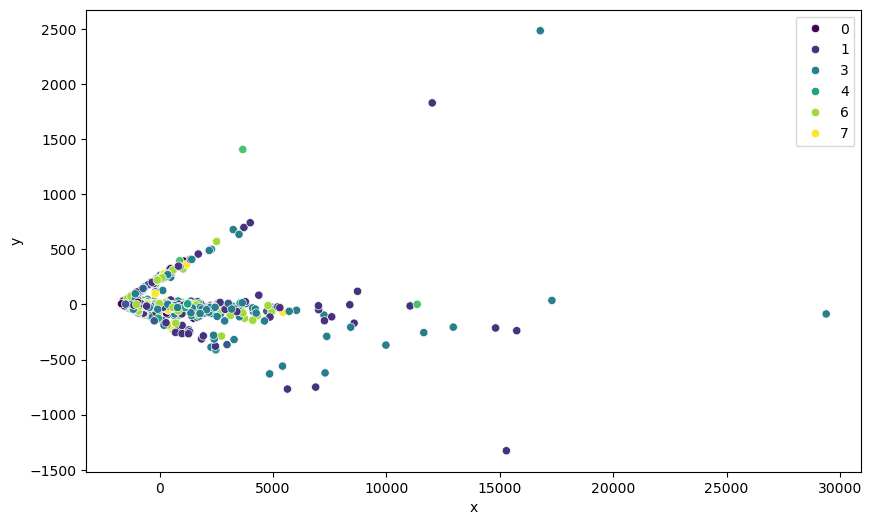

In [31]:
plot_pca(cluster_labels_gmm)

In [32]:
import umap.umap_ as umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

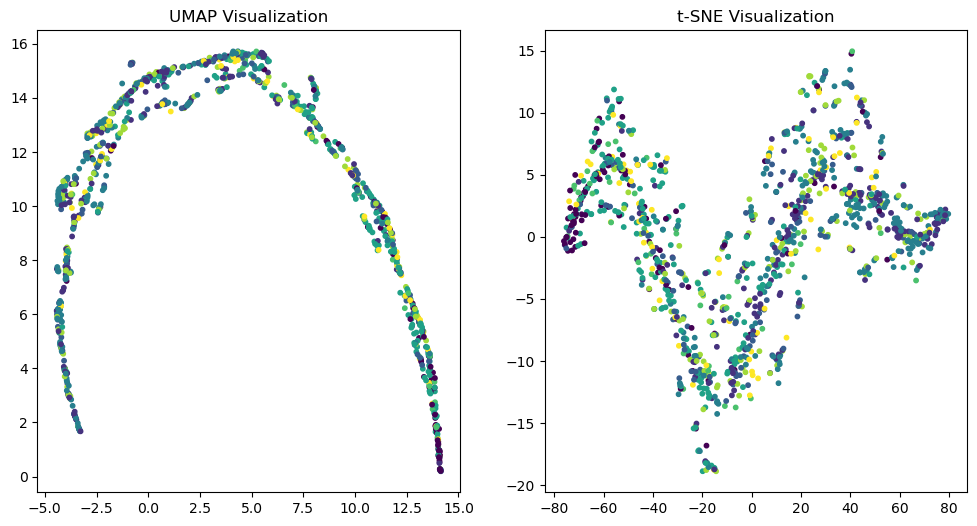

In [33]:
plot_umap_and_tsne(cluster_labels_gmm)

In [34]:
# peak_values_df.index = peak_values_df.index.round()
peak_values_df = peak_values_df[~peak_values_df.index.isin([np.nan, np.inf, -np.inf])]
peak_values_df.index = peak_values_df.index.astype(int)
# Group by the rounded age index and calculate the mean for each group
grouped_mean = peak_values_df.groupby(peak_values_df.index).mean()


grouped_mean


,AAAS,ABCB6,ABCC5,ABCC9,ABCE1,ABHD12,ABHD2,ABHD5,ABI1,ACAD8,...,ZNF683,ZNF691,ZNF705A,ZNF707,ZNF713,ZNF746,ZNF786,ZSCAN29,ZWILCH,ZZZ3
18,394.133473,93.920689,128.701207,28.911543,360.290139,280.300190,368.981846,177.195163,NaN,220.077361,...,131.636146,87.320381,18.043418,104.240881,46.405355,459.464484,415.204934,121.121705,NaN,442.272733
19,279.406881,82.476908,109.618811,27.099673,294.811835,248.501111,338.300995,180.627310,342.380772,184.217594,...,95.234957,78.215127,17.309066,97.752773,43.846334,388.175112,403.677915,100.493330,100.099491,339.851154
20,288.209902,83.350335,113.314207,27.336919,226.953271,246.669510,351.799939,168.150443,367.599046,174.096681,...,111.696611,74.746159,17.266496,90.359985,43.038997,441.610859,387.379031,113.674039,89.652051,273.201355
21,270.982015,88.412212,112.737615,27.741662,269.106877,260.996380,349.176041,170.206870,418.566582,183.258601,...,114.821053,73.263565,17.745603,94.408790,43.682340,376.221490,395.435565,105.173262,94.331260,330.805238
22,291.001799,85.535581,112.607067,27.209600,285.507494,227.268646,365.197787,171.890717,440.580434,179.111950,...,107.835409,74.922003,17.847804,92.382018,41.822760,421.724653,379.298062,108.243934,99.026143,370.229790
23,284.759915,82.032959,102.616021,27.063065,226.018300,250.685233,342.846065,168.535477,373.817231,149.850545,...,111.217343,73.998745,17.514549,82.141471,43.172499,429.407377,389.361750,86.294742,88.140312,288.349554
24,258.713223,84.488245,113.704194,27.646466,291.239368,257.962254,368.727101,166.753919,456.365695,187.582263,...,110.809603,77.990539,17.368663,85.697992,43.786208,373.239483,392.367838,103.294471,105.907467,346.745853
25,249.546464,86.716363,100.598066,27.651809,160.398974,236.472481,320.865514,160.638339,328.460116,164.081624,...,100.893348,71.750617,16.745684,96.768979,39.363597,418.148230,396.982794,104.797952,90.375282,186.582466
26,286.737651,87.564721,115.781022,27.530595,281.865822,264.098820,347.247826,174.537433,424.144979,176.554009,...,122.870535,81.571359,17.430237,93.647214,42.023440,413.504657,402.439610,109.229255,107.581543,356.055855
27,300.105728,84.644052,118.915102,27.728279,293.661091,254.008956,365.219477,174.219586,434.094777,179.809479,...,116.716141,72.637478,17.474261,80.971075,42.156647,387.516608,397.439663,111.835080,103.638221,338.311239


In [35]:
grouped_mean.columns

Index(['AAAS', 'ABCB6', 'ABCC5', 'ABCC9', 'ABCE1', 'ABHD12', 'ABHD2', 'ABHD5',
       'ABI1', 'ACAD8',
       ...
       'ZNF683', 'ZNF691', 'ZNF705A', 'ZNF707', 'ZNF713', 'ZNF746', 'ZNF786',
       'ZSCAN29', 'ZWILCH', 'ZZZ3'],
      dtype='object', length=1145)

In [36]:
grouped_mean.T.dropna(axis=1)

,20,23,25,26,27,28,29,30,41,46,58,61
AAAS,288.209902,284.759915,249.546464,286.737651,300.105728,250.663291,287.137400,266.103436,288.355978,314.866784,273.433221,331.373079
ABCB6,83.350335,82.032959,86.716363,87.564721,84.644052,78.460756,85.705788,81.240567,85.102971,89.976224,92.560162,92.114726
ABCC5,113.314207,102.616021,100.598066,115.781022,118.915102,108.019463,124.419217,116.057197,118.928972,106.096439,114.530352,112.367195
ABCC9,27.336919,27.063065,27.651809,27.530595,27.728279,27.162840,27.335300,27.461268,27.330856,27.592468,28.328620,28.135189
ABCE1,226.953271,226.018300,160.398974,281.865822,293.661091,292.057456,255.047375,305.598216,346.739738,247.985529,315.384416,309.120888
...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF746,441.610859,429.407377,418.148230,413.504657,387.516608,421.207414,419.361964,413.980564,452.120708,465.152089,470.203697,481.928721
ZNF786,387.379031,389.361750,396.982794,402.439610,397.439663,391.131317,393.198202,404.676125,398.210875,390.473197,388.236605,401.667797
ZSCAN29,113.674039,86.294742,104.797952,109.229255,111.835080,104.205352,105.785296,111.259339,112.184339,107.560677,114.243159,109.213379
ZWILCH,89.652051,88.140312,90.375282,107.581543,103.638221,93.026399,101.520823,102.991788,111.484567,99.620921,107.935458,107.614129


In [39]:
#grouped_mean = grouped_mean.drop(index = 9)
grouped_mean.head(2)

,AAAS,ABCB6,ABCC5,ABCC9,ABCE1,ABHD12,ABHD2,ABHD5,ABI1,ACAD8,...,ZNF683,ZNF691,ZNF705A,ZNF707,ZNF713,ZNF746,ZNF786,ZSCAN29,ZWILCH,ZZZ3
18,394.133473,93.920689,128.701207,28.911543,360.290139,280.300190,368.981846,177.195163,NaN,220.077361,...,131.636146,87.320381,18.043418,104.240881,46.405355,459.464484,415.204934,121.121705,NaN,442.272733
19,279.406881,82.476908,109.618811,27.099673,294.811835,248.501111,338.300995,180.627310,342.380772,184.217594,...,95.234957,78.215127,17.309066,97.752773,43.846334,388.175112,403.677915,100.493330,100.099491,339.851154


In [40]:
grouped_mean = grouped_mean.fillna(grouped_mean.shift(axis=0))

In [41]:
#grouped_mean = grouped_mean.drop(index = 70)
grouped_mean.head()

,AAAS,ABCB6,ABCC5,ABCC9,ABCE1,ABHD12,ABHD2,ABHD5,ABI1,ACAD8,...,ZNF683,ZNF691,ZNF705A,ZNF707,ZNF713,ZNF746,ZNF786,ZSCAN29,ZWILCH,ZZZ3
18,394.133473,93.920689,128.701207,28.911543,360.290139,280.300190,368.981846,177.195163,NaN,220.077361,...,131.636146,87.320381,18.043418,104.240881,46.405355,459.464484,415.204934,121.121705,NaN,442.272733
19,279.406881,82.476908,109.618811,27.099673,294.811835,248.501111,338.300995,180.627310,342.380772,184.217594,...,95.234957,78.215127,17.309066,97.752773,43.846334,388.175112,403.677915,100.493330,100.099491,339.851154
20,288.209902,83.350335,113.314207,27.336919,226.953271,246.669510,351.799939,168.150443,367.599046,174.096681,...,111.696611,74.746159,17.266496,90.359985,43.038997,441.610859,387.379031,113.674039,89.652051,273.201355
21,270.982015,88.412212,112.737615,27.741662,269.106877,260.996380,349.176041,170.206870,418.566582,183.258601,...,114.821053,73.263565,17.745603,94.408790,43.682340,376.221490,395.435565,105.173262,94.331260,330.805238
22,291.001799,85.535581,112.607067,27.209600,285.507494,227.268646,365.197787,171.890717,440.580434,179.111950,...,107.835409,74.922003,17.847804,92.382018,41.822760,421.724653,379.298062,108.243934,99.026143,370.229790


In [42]:
grouped_mean.index

Index([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
      dtype='int64')

In [52]:
#grouped_mean.loc[31] = (grouped_mean.loc[30]+grouped_mean.loc[32])/2
#grouped_mean.loc[55] = (grouped_mean.loc[54]+grouped_mean.loc[56])/2
#grouped_mean.loc[61] = (grouped_mean.loc[60]+grouped_mean.loc[62])/2
#grouped_mean.loc[63] = (grouped_mean.loc[62]+grouped_mean.loc[64])/2

In [43]:
# df_trans = grouped_mean.T.fillna(mean)
df_trans = grouped_mean.T

df_trans.columns = df_trans.columns.astype(int)
# Define the window size
window_size = 2

# Create an empty DataFrame to store the results

mean_window_df = pd.DataFrame(index=df_trans.T.columns)

# Loop through each age
for age in df_trans.columns:
    # Define the age range for the window
    # age = int(age)
    age_range = list(range(age - window_size, age + window_size + 1))
    age_range = [a for a in age_range if a >= df_trans.columns.min() and a <= df_trans.columns.max()]

    # age_range = age_range[(age_range >= df_trans.columns.min()) & (age_range <= df_trans.columns.max())]  # Ensure age range is within column range
    # print(age_range)
    # Calculate the mean for each CpG over the age range

    mean_values = df_trans[age_range].mean(axis=1)

    # Add the mean values to the DataFrame
    mean_window_df[age] = mean_values

# Transpose the DataFrame to have ages as rows and CpGs as columns
mean_window_df = mean_window_df.T
mean_window_df.head()

,AAAS,ABCB6,ABCC5,ABCC9,ABCE1,ABHD12,ABHD2,ABHD5,ABI1,ACAD8,...,ZNF683,ZNF691,ZNF705A,ZNF707,ZNF713,ZNF746,ZNF786,ZSCAN29,ZWILCH,ZZZ3
18,320.583419,86.582644,117.211408,27.782712,294.018415,258.490271,353.027593,175.324305,354.989909,192.797212,...,112.855905,80.093889,17.539660,97.451213,44.430228,429.750152,402.087293,111.763024,94.875771,351.775081
19,308.183068,87.040036,116.092960,27.772449,287.790531,259.116798,352.064705,174.044946,376.182134,190.412559,...,113.347192,78.386308,17.591145,96.690607,44.243256,416.367986,400.424361,110.115584,94.694267,346.532620
20,304.746814,86.739145,115.395781,27.659879,287.333923,252.747168,354.691322,173.614100,392.281709,188.152437,...,112.244835,77.693447,17.642477,95.828889,43.759157,417.439320,396.199101,109.741254,95.777236,351.272054
21,282.872102,84.361599,110.178744,27.290184,260.479555,246.824176,349.464165,171.882163,388.588813,174.107074,...,108.161074,75.029120,17.536703,91.409007,43.112586,411.427898,391.030465,102.775861,94.249852,320.487418
22,278.733371,84.763866,110.995821,27.399543,259.765062,248.716405,355.549387,169.107485,411.385798,174.780008,...,111.276004,74.984202,17.548623,88.998051,43.100561,408.440772,388.768449,103.336090,95.411447,321.866358


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

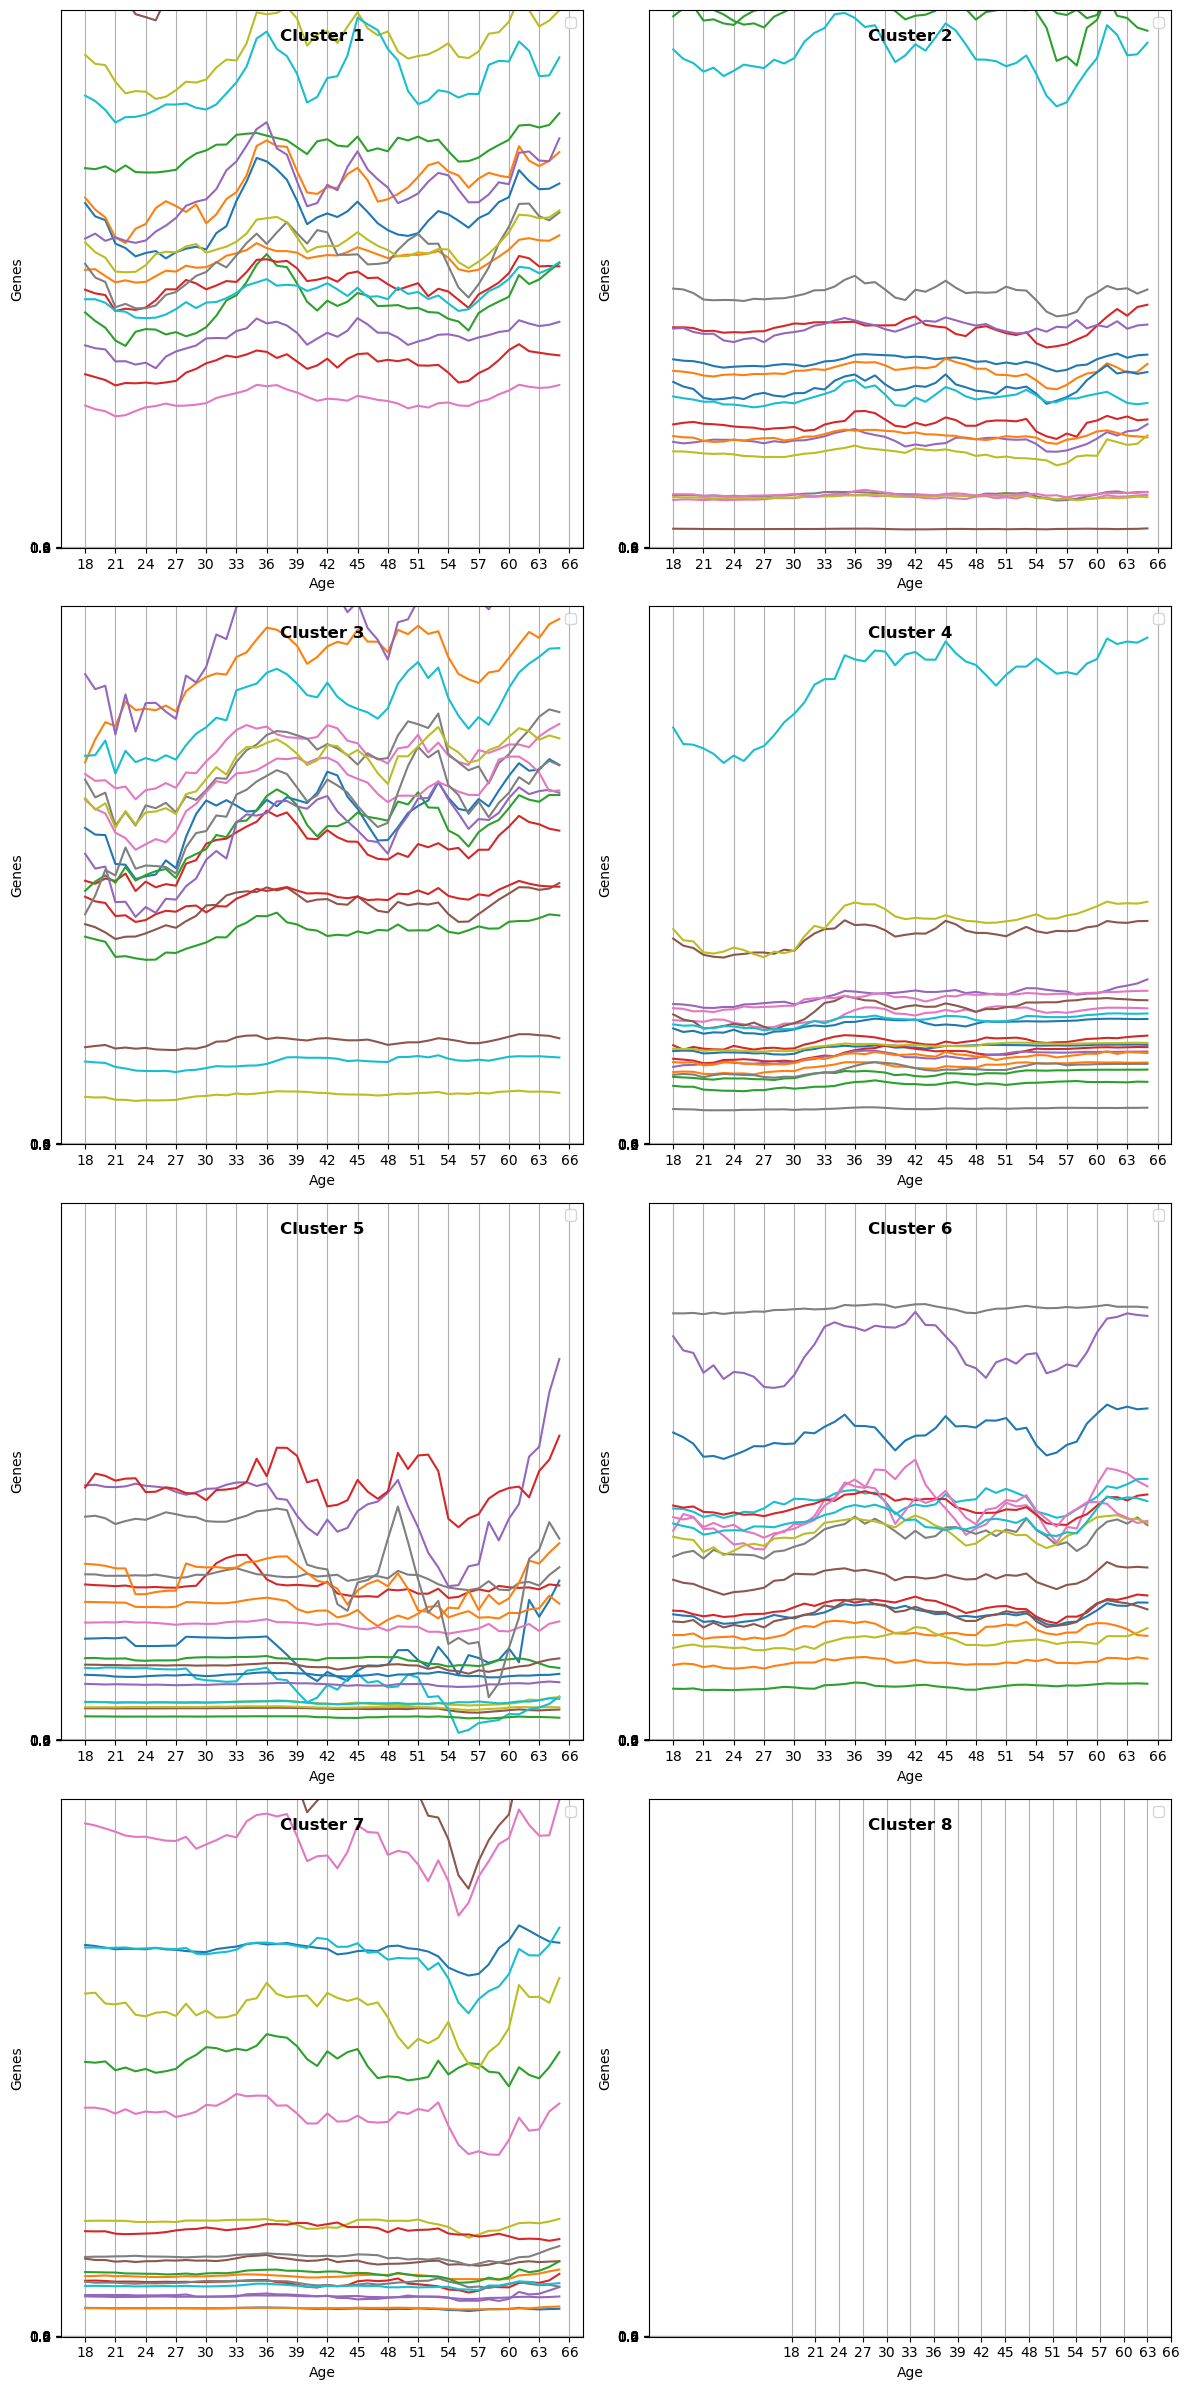

In [46]:
df_mean_for_statistics = mean_window_df.T
df_mean_for_statistics['cluster'] = cluster_labels_gmm
num_clusters = len(df_mean_for_statistics['cluster'].unique())
num_rows = num_clusters // 2
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

if num_rows == 1:
    axs = axs.reshape(1, -1)

for cluster_id in range(1, num_clusters + 1):
    cluster_data = df_mean_for_statistics[df_mean_for_statistics['cluster'] == cluster_id]

    row_idx = (cluster_id - 1) // num_cols
    col_idx = (cluster_id - 1) % num_cols

    ax = axs[row_idx, col_idx]

    for cg_value in cluster_data.index[:20]:
        # Filter data for the current CpG site
        subset = mean_window_df[[cg_value]].sort_index()
        # Plot the scatter plot for the current CpG site
        ax.plot(subset.index, subset[cg_value], label='')#label=f'CpG={cg_value}')

    ax.set_ylim(0, 500)

    ax.set_yticks(np.arange(0, 1.1, 0.2))
    ax.set_xticks(np.arange(18, 67, 3))

    ax.set_xlabel('Age')
    ax.set_ylabel('Genes')
    ax.grid(True)
    ax.legend(loc='upper right')
    ax.text(0.5, 0.95, f'Cluster {cluster_id}', ha='center', va='center', transform=ax.transAxes, fontsize=12, fontweight='bold')


plt.tight_layout()
plt.savefig('cluster_plot1_female.png')
plt.show()

In [47]:
df_mean_for_statistics.head()

,18,19,20,21,22,23,24,25,26,27,...,57,58,59,60,61,62,63,64,65,cluster
AAAS,320.583419,308.183068,304.746814,282.872102,278.733371,271.000683,274.151811,275.972596,269.153272,274.838107,...,306.575659,311.043942,321.455849,325.975066,351.173226,341.045898,333.411208,333.920740,338.699290,1
ABCB6,86.582644,87.040036,86.739145,84.361599,84.763866,85.437072,85.267574,85.089268,84.374827,84.618336,...,91.692163,91.797965,92.045234,92.446870,92.474553,92.549991,92.536955,92.642512,92.362804,4
ABCC5,117.211408,116.092960,115.395781,110.178744,110.995821,108.452593,109.061274,110.322881,111.403570,113.546574,...,109.700121,110.595951,115.429128,120.946572,127.564612,125.381482,125.069815,128.245470,128.135478,6
ABCC9,27.782712,27.772449,27.659879,27.290184,27.399543,27.462520,27.420307,27.524043,27.543998,27.481764,...,28.305397,28.288784,28.224998,28.276232,28.299799,28.230058,28.321901,28.368579,28.374246,0
ABCE1,294.018415,287.790531,287.333923,260.479555,259.765062,246.454202,249.005991,250.636711,263.844542,256.606144,...,320.850091,313.941852,328.764426,342.387411,354.112636,347.137990,348.159499,357.919152,352.555355,3


# Ходим по кластерам

## 5 кластер

In [48]:
cluster_5_genes = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 5].index.tolist()

print("Genes in Cluster 5:")
print(cluster_5_genes)

Genes in Cluster 5:
['B3GNT5', 'BANK1', 'BEND2', 'CD180', 'CDKN1A', 'CENPE', 'CTTN', 'DNM3', 'DSCC1', 'EMP1', 'EPHB1', 'EREG', 'EYS', 'FAM118A', 'FAM124A', 'HAL', 'HBB', 'HBD', 'HORMAD1', 'KCNH8', 'LMO2', 'LTBP1', 'LYZ', 'NR4A3', 'NRG1', 'PBX1', 'PEG10', 'PID1', 'PKHD1L1', 'QRFPR', 'RALGPS2', 'RBPMS2', 'RGS13', 'SERPINB2', 'SERPINE1', 'SLC24A4', 'SLC41A2', 'SLITRK4', 'TFPI', 'THBS1', 'TSPAN1', 'TSPAN13', 'TSPAN3']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Selected genes:
['B3GNT5', 'BANK1', 'BEND2', 'CD180', 'CDKN1A', 'CENPE', 'CTTN', 'DNM3', 'DSCC1', 'EMP1', 'EREG', 'EYS', 'HAL', 'HBB', 'HBD', 'HORMAD1', 'KCNH8', 'LMO2', 'LYZ', 'NR4A3', 'PBX1', 'PKHD1L1', 'QRFPR', 'RALGPS2', 'RGS13', 'SERPINB2', 'SERPINE1', 'SLC24A4', 'SLC41A2', 'TFPI', 'THBS1', 'TSPAN13']


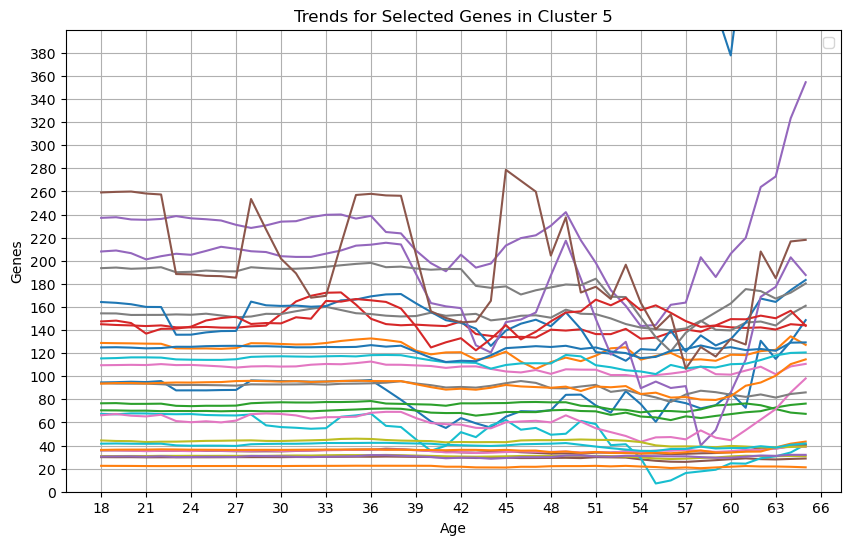

In [51]:
selected_genes = []
for gene_name in cluster_5_data.index:
    mean_expression_30_to_35 = mean_window_df.loc[30:35, gene_name].mean()
    mean_expression_36_to_43 = mean_window_df.loc[36:43, gene_name].mean()
    if mean_expression_30_to_35 > mean_expression_36_to_43:
        selected_genes.append(gene_name)

print("Selected genes:")
print(selected_genes)

plt.figure(figsize=(10, 6))
for gene_name in selected_genes:
    subset = mean_window_df[[gene_name]].sort_index()
    plt.plot(subset.index, subset[gene_name], label='')

plt.xlabel('Age')
plt.ylabel('Genes')
plt.xticks(np.arange(18, 67, 3))
plt.yticks(np.arange(0, 1.1, 0.2))
plt.yticks(np.arange(0, 400, 20))
plt.ylim(0, 400)
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Trends for Selected Genes in Cluster 5')

plt.show()


### Снижение наблюдается в 37-42 у этих генов: 'B3GNT5', 'BANK1', 'BEND2', 'CD180', 'CDKN1A', 'CENPE', 'CTTN', 'DNM3', 'DSCC1', 'EMP1', 'EREG', 'EYS', 'HAL', 'HBB', 'HBD', 'HORMAD1', 'KCNH8', 'LMO2', 'LYZ', 'NR4A3', 'PBX1', 'PKHD1L1', 'QRFPR', 'RALGPS2', 'RGS13', 'SERPINB2', 'SERPINE1', 'SLC24A4', 'SLC41A2', 'TFPI', 'THBS1', 'TSPAN13'

## 7 класет

In [52]:
cluster_7_genes = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 7].index.tolist()

print("Genes in Cluster 7:")
print(cluster_7_genes)

Genes in Cluster 7:
['AKR1C4', 'ATL1', 'CCDC59', 'CCRL2', 'CDKN3', 'CEBPB', 'CEBPD', 'CETN3', 'DOCK5', 'ELOVL6', 'ENDOG', 'ENPEP', 'ENPP5', 'EPB41L2', 'EPB41L4A', 'EPS8', 'ETF1', 'FRMD3', 'GZMB', 'HCK', 'HHEX', 'HIP1', 'HK2', 'HK3', 'ICA1L', 'ICAM5', 'KCNE3', 'KLF10', 'LAP3', 'LILRA1', 'LILRA2', 'LILRB4', 'LINGO2', 'LRP1', 'LTBR', 'MAFG', 'MARCKS', 'MARCKSL1', 'MRPL22', 'MRPL44', 'MXD1', 'NOX1', 'P2RX1', 'P2RY2', 'PALLD', 'PAPSS2', 'PAQR7', 'PDGFC', 'PLB1', 'PPIF', 'PRAM1', 'PRRG4', 'PRSS23', 'RGS10', 'RNASE2', 'RNASE6', 'RPGRIP1', 'SAMSN1', 'SFXN5', 'SLC7A7', 'SMAD7', 'SPATS2L', 'SPTY2D1', 'TCHH', 'TGFBI', 'TGIF1', 'THBD', 'TIMP2', 'TLE1', 'TLR2', 'TLR4', 'TMEM51', 'TOM1', 'TSPYL2', 'TUBB1', 'VPS37C', 'WDFY3', 'WIPI1', 'ZC3HAV1L']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


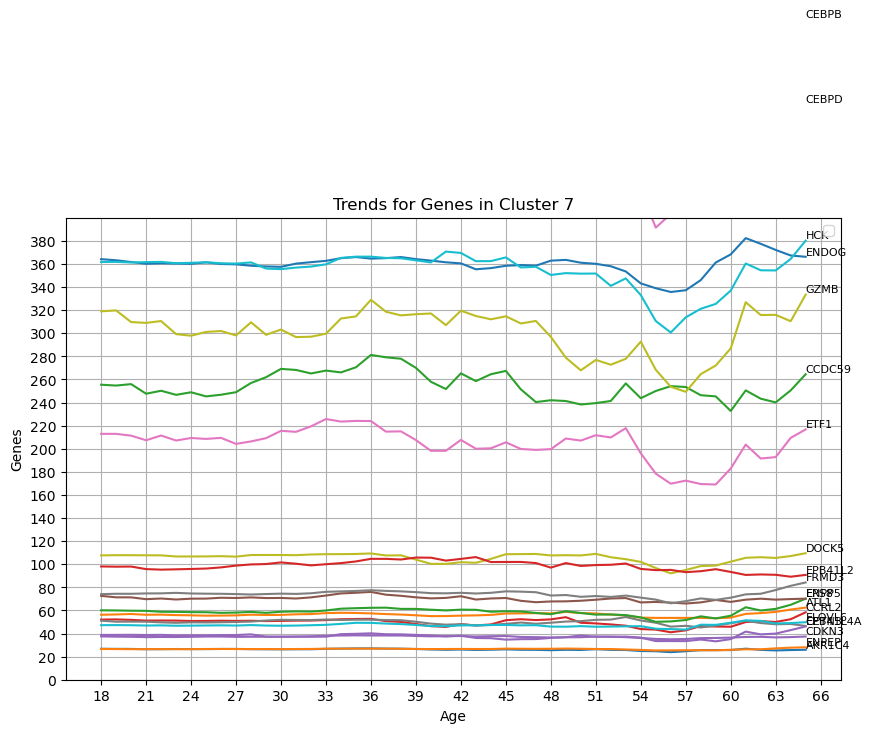

In [56]:
cluster_7_data = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 7]

plt.figure(figsize=(10, 6))

for gene_name in cluster_7_data.index[:20]:
    subset = mean_window_df[[gene_name]].sort_index()
    plt.plot(subset.index, subset[gene_name], label='')

    last_value = subset[gene_name].iloc[-1]
    plt.text(subset.index[-1], last_value, gene_name, fontsize=8, verticalalignment='bottom')


plt.xlabel('Age')
plt.ylabel('Genes')
plt.xticks(np.arange(18, 67, 3))
plt.yticks(np.arange(0, 400, 20))
plt.ylim(0, 400)
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Trends for Genes in Cluster 7')

plt.show()


### Вывод: 



## 3 кластер

In [58]:
cluster_3_genes = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 3].index.tolist()

print("Genes in Cluster 3:")
print(cluster_3_genes)

Genes in Cluster 3:
['ABCE1', 'ABI1', 'ACAD8', 'AGGF1', 'ANKRD17', 'ANKRD27', 'APPL1', 'ARL5B', 'ARL6', 'ARMC2', 'ARPC2', 'ASH2L', 'ATE1', 'ATG16L1', 'ATG2B', 'AVEN', 'BAZ1B', 'BRWD1', 'BRWD3', 'BTAF1', 'CACYBP', 'CAPRIN1', 'CCDC6', 'CDK6', 'CDKN1B', 'CDRT4', 'CFL2', 'CHD1', 'CHD3', 'CHRAC1', 'CLN8', 'CNOT1', 'COMMD9', 'CPSF6', 'CUBN', 'CUL5', 'CUTC', 'DDX52', 'DERL2', 'DET1', 'DIDO1', 'DNAJB6', 'DNM1L', 'DUS4L', 'EIF2AK1', 'ELK3', 'EPB41', 'EPHX2', 'EPS15', 'ERC1', 'ERCC3', 'ERCC5', 'ERCC6', 'ERP44', 'ETFDH', 'EXOSC3', 'EXOSC7', 'FBXO30', 'FOXN3', 'FTO', 'FXR1', 'GGCT', 'GIGYF2', 'GLIPR1', 'GOLT1B', 'GORASP2', 'GPATCH2', 'GPBP1', 'HADHA', 'HDAC1', 'HDHD2', 'HDLBP', 'HELLS', 'HERC4', 'HGSNAT', 'HIBADH', 'HIVEP2', 'HTT', 'HUWE1', 'INTS4', 'ISOC1', 'JMJD1C', 'KBTBD7', 'KDELR2', 'KRR1', 'LACTB2', 'LIAS', 'LIX1L', 'LNPEP', 'LPP', 'LRIG1', 'M6PR', 'MAD2L1', 'MAGOHB', 'MAPKAP1', 'MCCC2', 'MED31', 'METTL5', 'MID2', 'MLH3', 'MLLT10', 'MON2', 'MPP7', 'MRPS27', 'MTBP', 'MTMR4', 'MYCBP2', 'N6AMT1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


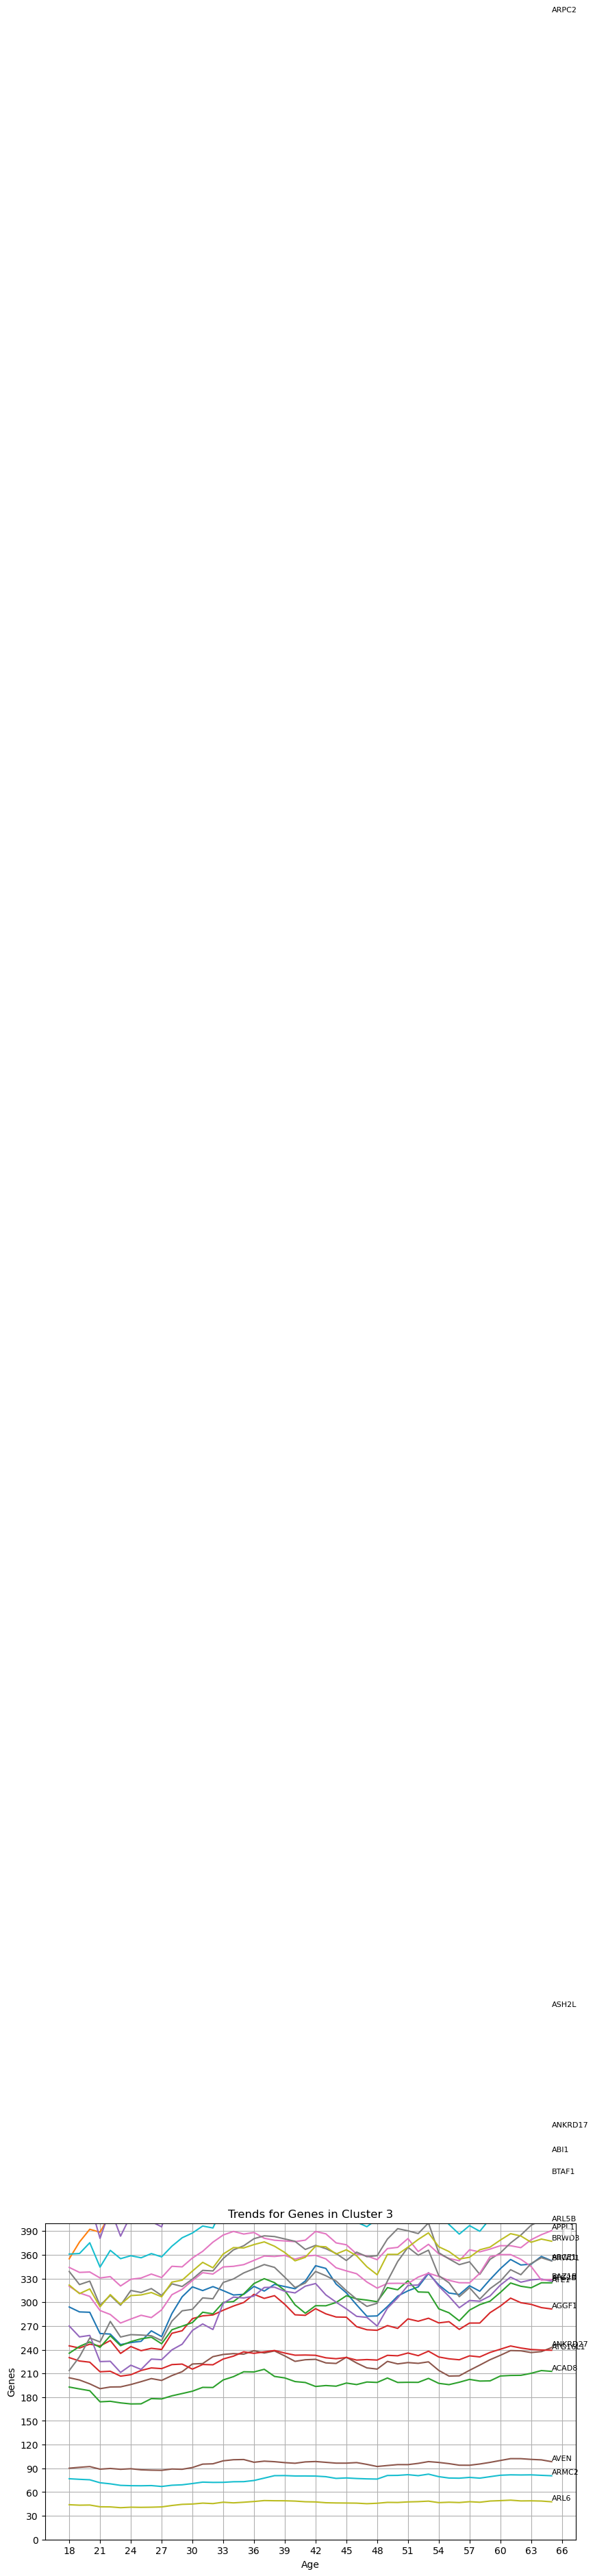

In [59]:
cluster_3_data = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 3]

plt.figure(figsize=(10, 6))

for gene_name in cluster_3_data.index[:20]:
    subset = mean_window_df[[gene_name]].sort_index()
    plt.plot(subset.index, subset[gene_name], label='')#label=f'Gene={gene_name}')

    last_value = subset[gene_name].iloc[-1]
    plt.text(subset.index[-1], last_value, gene_name, fontsize=8, verticalalignment='bottom')


plt.xlabel('Age')
plt.ylabel('Genes')
plt.xticks(np.arange(18, 67, 3))
plt.yticks(np.arange(0, 400, 30))
plt.ylim(0, 400)
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Trends for Genes in Cluster 3')

plt.show()


['ANKRD17', 'ATG2B', 'BRWD1', 'CACYBP', 'CLN8', 'CUBN', 'GPBP1', 'HIVEP2', 'JMJD1C', 'LNPEP', 'LRIG1', 'MAD2L1', 'MID2', 'MON2', 'MYCBP2', 'PGAP1', 'RAD50', 'RRP1B', 'SECISBP2', 'TBC1D2B', 'TC2N', 'TERF1', 'TIA1', 'TMPO', 'TSPAN5', 'ZNF383', 'ZZZ3']


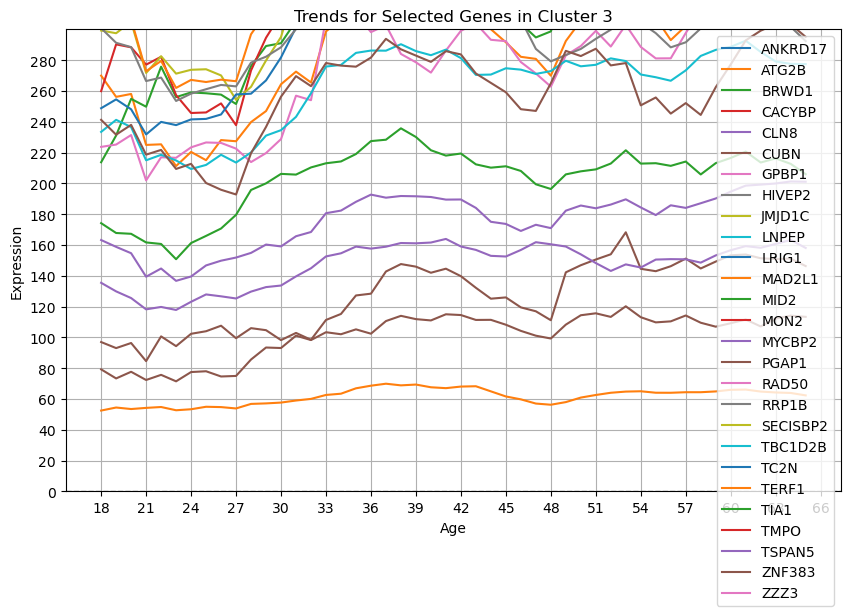

In [62]:
import matplotlib.pyplot as plt

cluster_3_data = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 3]

selected_genes = []

for gene_name in cluster_3_data.index:
    mean_expression_18_to_35 = mean_window_df.loc[18:35, gene_name].mean()
    mean_expression_35_to_42 = mean_window_df.loc[35:42, gene_name].mean()
    if (mean_expression_35_to_42 / mean_expression_18_to_35) > 1.2:
        selected_genes.append(gene_name)

plt.figure(figsize=(10, 6))
for gene_name in selected_genes:
    subset = mean_window_df[[gene_name]].sort_index()
    plt.plot(subset.index, subset[gene_name], label=gene_name)


print (selected_genes)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)

plt.xlabel('Age')
plt.ylabel('Expression')
plt.xticks(np.arange(18, 67, 3))
plt.yticks(np.arange(0, 300, 20))
plt.ylim(0, 300)
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Trends for Selected Genes in Cluster 3')

plt.show()


### Вывод:
Видны заметные переходы у мужчин в период 37-42 кода в генах 'ANKRD17', 'ATG2B', 'BRWD1', 'CACYBP', 'CLN8', 'CUBN', 'GPBP1', 'HIVEP2', 'JMJD1C', 'LNPEP', 'LRIG1', 'MAD2L1', 'MID2', 'MON2', 'MYCBP2', 'PGAP1', 'RAD50', 'RRP1B', 'SECISBP2', 'TBC1D2B', 'TC2N', 'TERF1', 'TIA1', 'TMPO', 'TSPAN5', 'ZNF383', 'ZZZ3'

## 4 кластер 

In [108]:
cluster_4_genes = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 4].index.tolist()

print("Genes in Cluster 4:")
print(cluster_4_genes)

Genes in Cluster 4:
['AAAS', 'ACAD8', 'ACD', 'ACOT8', 'ALG1', 'ALG12', 'APH1A', 'ARHGAP30', 'ASXL1', 'ATF7', 'BRD2', 'BRD3', 'BSDC1', 'CCDC120', 'CCDC69', 'CDK2', 'CDK5', 'CHD3', 'CLPTM1L', 'CMC1', 'COQ9', 'CTDSP2', 'DNAJA3', 'DNAJC18', 'DPP3', 'DPP9', 'ENO2', 'EPHB6', 'EPHX2', 'ERCC2', 'ERCC3', 'ERI3', 'ETFA', 'FMNL3', 'GNPDA1', 'GOLPH3', 'HCLS1', 'HDAC1', 'HDAC6', 'HDLBP', 'HGSNAT', 'HK1', 'HTT', 'HUWE1', 'KIF21B', 'KRI1', 'KRT73', 'LAMP3', 'LAP3', 'LAT', 'LHPP', 'LIX1L', 'LMNB1', 'LRP10', 'LSS', 'LTB', 'LY9', 'MARK2', 'MED16', 'MRPL4', 'MTA1', 'NEK8', 'NFS1', 'NOL6', 'NUP214', 'OXA1L', 'P2RX4', 'PAFAH2', 'PARVG', 'PBLD', 'PBX2', 'PCK2', 'PDPR', 'PELP1', 'PIGQ', 'PIM2', 'POLDIP2', 'PPRC1', 'PSTPIP1', 'RER1', 'RGS10', 'RIPK3', 'RNF167', 'RNF26', 'RPAP1', 'SAE1', 'SAMD4B', 'SARM1', 'SCAMP2', 'SCAMP3', 'SFXN5', 'SH2D3A', 'SLC25A23', 'SLC35C2', 'SLC37A1', 'SND1', 'SNRNP200', 'SNRNP35', 'SNUPN', 'SOCS3', 'SPATS2L', 'SPEN', 'SSU72', 'TAF1C', 'TAF5L', 'TAPBPL', 'TBC1D9B', 'TESK1', 'TFAP4', 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


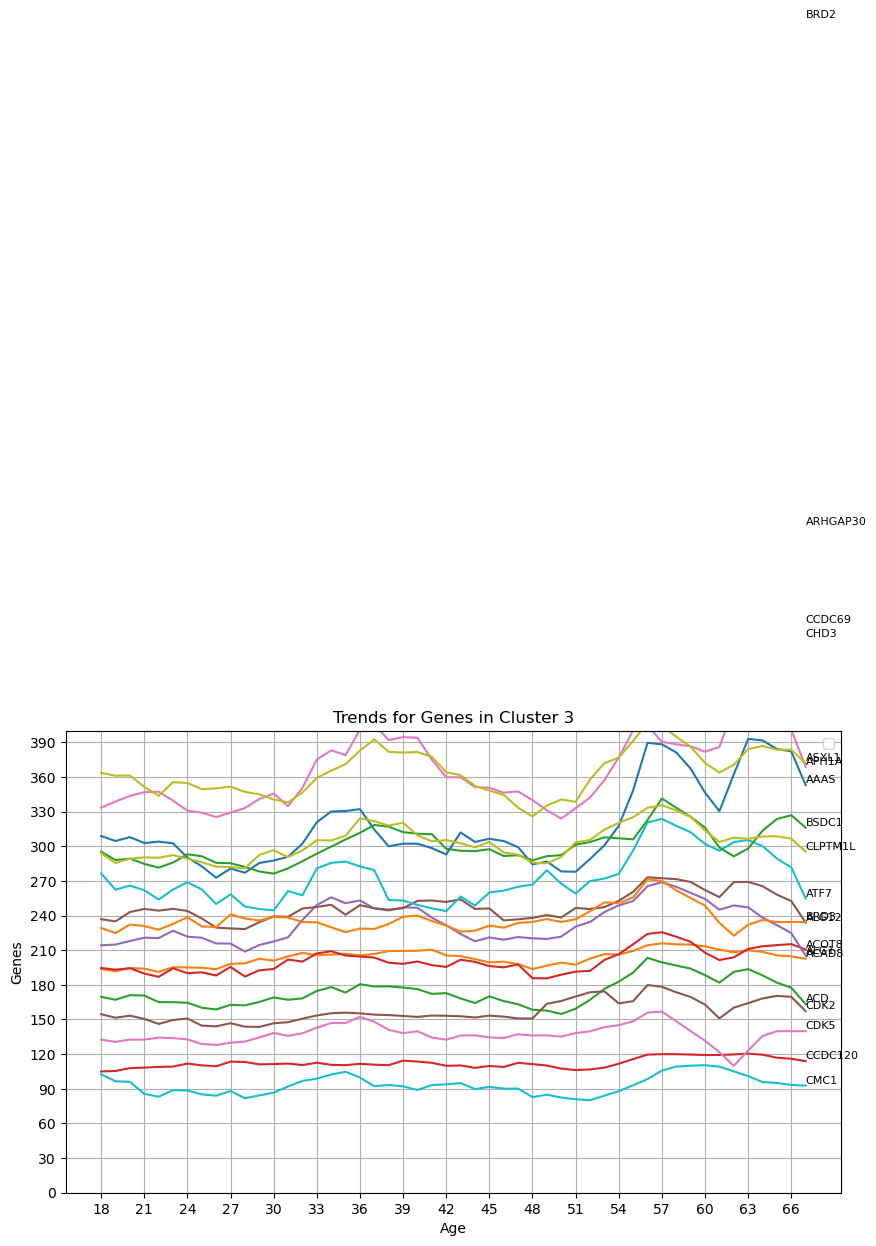

In [110]:
cluster_4_data = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 4]

plt.figure(figsize=(10, 6))

for gene_name in cluster_4_data.index[:20]:
    subset = mean_window_df[[gene_name]].sort_index()
    plt.plot(subset.index, subset[gene_name], label='')#label=f'Gene={gene_name}')

    last_value = subset[gene_name].iloc[-1]
    plt.text(subset.index[-1], last_value, gene_name, fontsize=8, verticalalignment='bottom')


plt.xlabel('Age')
plt.ylabel('Genes')
plt.xticks(np.arange(18, 67, 3))
plt.yticks(np.arange(0, 400, 30))
plt.ylim(0, 400)
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Trends for Genes in Cluster 3')

plt.show()


['ASPSCR1', 'ATP6V0E2', 'CENPK', 'CHST13', 'CLDN6', 'EPHA1', 'FLJ42393', 'MRPL11', 'NOSIP', 'NR2F6', 'OVGP1', 'PLEKHA7', 'RPUSD2', 'SEMA5A', 'SLC22A12', 'ST6GALNAC4', 'SUMO4', 'TBC1D16', 'TFAP4', 'TMCO4', 'TMEM44', 'UBE2M', 'UPF3A', 'ZBTB32']


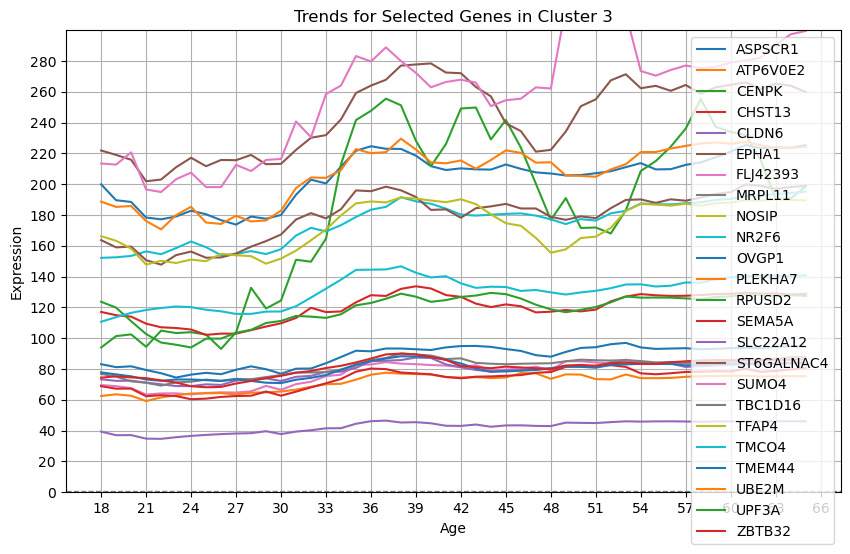

In [68]:
import matplotlib.pyplot as plt

cluster_4_data = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 4]

selected_genes = []

for gene_name in cluster_4_data.index:
    mean_expression_18_to_35 = mean_window_df.loc[18:35, gene_name].mean()
    mean_expression_35_to_42 = mean_window_df.loc[35:42, gene_name].mean()
    if (mean_expression_35_to_42 / mean_expression_18_to_35) > 1.15:
        selected_genes.append(gene_name)

plt.figure(figsize=(10, 6))
for gene_name in selected_genes:
    subset = mean_window_df[[gene_name]].sort_index()
    plt.plot(subset.index, subset[gene_name], label=gene_name)


print (selected_genes)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)

plt.xlabel('Age')
plt.ylabel('Expression')
plt.xticks(np.arange(18, 67, 3))
plt.yticks(np.arange(0, 300, 20))
plt.ylim(0, 300)
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Trends for Selected Genes in Cluster 3')

plt.show()

Переход в 37 заметен и у генов ASPSCR1', 'ATP6V0E2', 'BOLA1', 'CENPK', 'CHST13', 'CLDN6', 'DCST1', 'EPHA1', 'FLJ42393', 'FOSL1', 'HCG27', 'LRIT1', 'LRP3', 'MRPL11', 'NOSIP', 'NR2F6', 'PLEKHA7', 'RPUSD2', 'SEMA5A', 'SH2D3A', 'SLC22A12', 'ST6GALNAC4', 'SUMO4', 'TBC1D16', 'TF', 'TFAP4', 'TMCO4', 'TMED1', 'TMEM44', 'TSPAN6', 'UBE2M', 'UPF3A', 'ZBTB32'

## 1 кластер 

In [69]:
cluster_1_genes = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 1].index.tolist()

print("Genes in Cluster 1:")
print(cluster_1_genes)

Genes in Cluster 1:
['AAAS', 'ABHD12', 'ABHD2', 'ACD', 'ACOT8', 'ACTR2', 'ADCK5', 'ADIPOR1', 'ADRM1', 'AGTRAP', 'AHNAK', 'AIP', 'ALG1', 'ALG12', 'APH1A', 'ARHGAP30', 'ARPC1B', 'ATF7', 'ATG9A', 'BRD3', 'CALHM2', 'CCDC124', 'CCDC86', 'CDAN1', 'CDK4', 'CDK5', 'CDK9', 'CENPB', 'CFL1', 'CHD4', 'CIAPIN1', 'CLPTM1L', 'CNIH4', 'CTDSP2', 'CTSC', 'CUEDC2', 'CYB561D2', 'DCTPP1', 'DNAJA3', 'DOK2', 'DPP3', 'DPP9', 'DUSP14', 'EMD', 'EMP3', 'ENO1', 'EPAS1', 'ERCC2', 'ERF', 'ERH', 'ERI3', 'ETFA', 'EXOSC1', 'FAHD2A', 'FBL', 'FMNL3', 'FOXRED2', 'FRAT1', 'GLIPR2', 'GLOD4', 'GLRX2', 'GNPDA1', 'GPR68', 'HDAC5', 'HDAC6', 'HEXA', 'HIP1R', 'HK1', 'HNRNPUL1', 'IL18BP', 'KERA', 'KIF21B', 'LAT', 'LRP10', 'LRPAP1', 'LSS', 'MAF', 'MAP7', 'MARK2', 'MECR', 'MED16', 'MLF2', 'MOAP1', 'MRPL18', 'MRPL4', 'MRPL9', 'NDUFA13', 'NEK8', 'NOC4L', 'NOL6', 'NUBP2', 'ORMDL2', 'OXA1L', 'P2RX4', 'PAFAH2', 'PARP3', 'PARVG', 'PCBD1', 'PCBP1', 'PCBP2', 'PCK2', 'PDCD7', 'PEBP1', 'PELP1', 'PERP', 'PGAM5', 'PHLDB2', 'PHPT1', 'PIGQ', 'PI

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


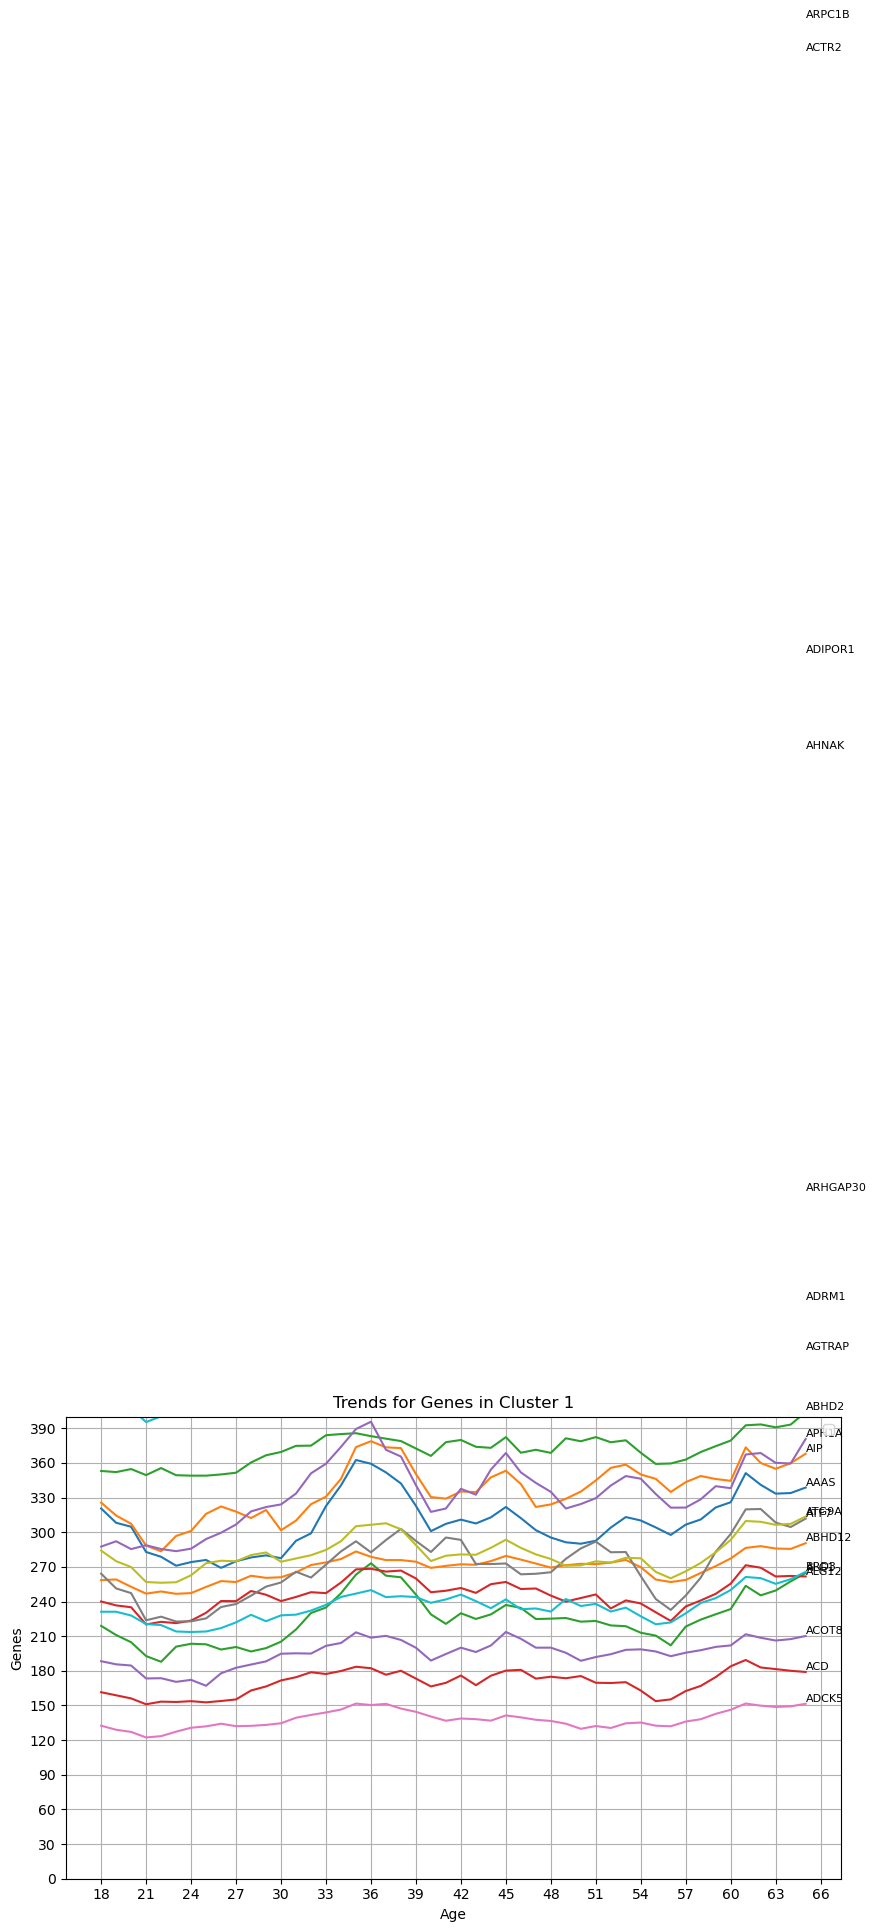

In [70]:
cluster_1_data = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 1]

plt.figure(figsize=(10, 6))

for gene_name in cluster_1_data.index[:20]:
    subset = mean_window_df[[gene_name]].sort_index()
    plt.plot(subset.index, subset[gene_name], label='')#label=f'Gene={gene_name}')

    last_value = subset[gene_name].iloc[-1]
    plt.text(subset.index[-1], last_value, gene_name, fontsize=8, verticalalignment='bottom')


plt.xlabel('Age')
plt.ylabel('Genes')
plt.xticks(np.arange(18, 67, 3))
plt.yticks(np.arange(0, 400, 30))
plt.ylim(0, 400)
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Trends for Genes in Cluster 1')

plt.show()


['AHNAK', 'ALG1', 'ATF7', 'CCDC124', 'CDK4', 'FAHD2A', 'KIF21B', 'LRP10', 'MARK2', 'MED16', 'NOL6', 'PARP3', 'PERP', 'PIGS', 'PIM2', 'RNF26', 'SH2D3C', 'SLC25A29', 'TESK1', 'THRA', 'TMEM109', 'TMEM115', 'VPS33A']


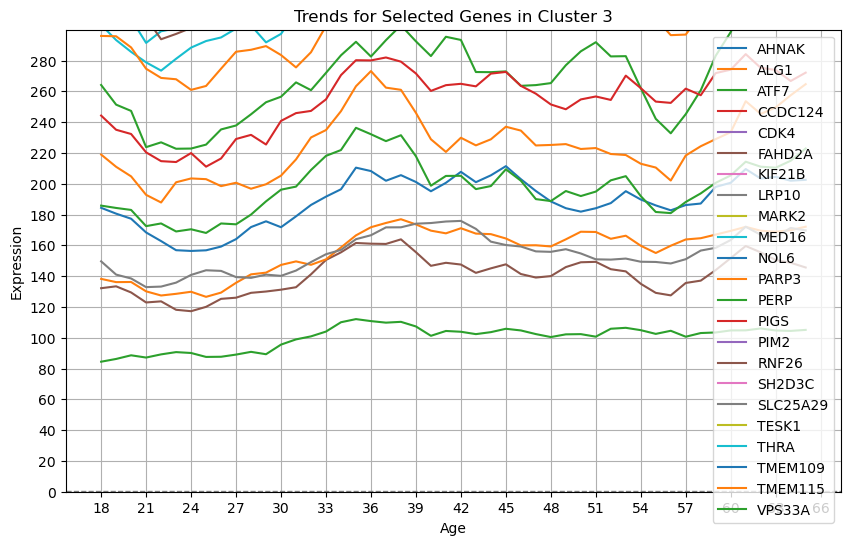

In [71]:
import matplotlib.pyplot as plt

cluster_1_data = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 1]

selected_genes = []

for gene_name in cluster_1_data.index:
    mean_expression_18_to_35 = mean_window_df.loc[18:35, gene_name].mean()
    mean_expression_35_to_42 = mean_window_df.loc[35:42, gene_name].mean()
    if (mean_expression_35_to_42 / mean_expression_18_to_35) > 1.15:
        selected_genes.append(gene_name)

plt.figure(figsize=(10, 6))
for gene_name in selected_genes:
    subset = mean_window_df[[gene_name]].sort_index()
    plt.plot(subset.index, subset[gene_name], label=gene_name)


print (selected_genes)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)

plt.xlabel('Age')
plt.ylabel('Expression')
plt.xticks(np.arange(18, 67, 3))
plt.yticks(np.arange(0, 300, 20))
plt.ylim(0, 300)
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Trends for Selected Genes in Cluster 3')

plt.show()

Еще у девушек заметны переходы в генах: AHNAK', 'ALG1', 'ATF7', 'CCDC124', 'CDK4', 'FAHD2A', 'KIF21B', 'LRP10', 'MARK2', 'MED16', 'NOL6', 'PARP3', 'PERP', 'PIGS', 'PIM2', 'RNF26', 'SH2D3C', 'SLC25A29', 'TESK1', 'THRA', 'TMEM109', 'TMEM115', 'VPS33A'

### Строим график для пересечений 

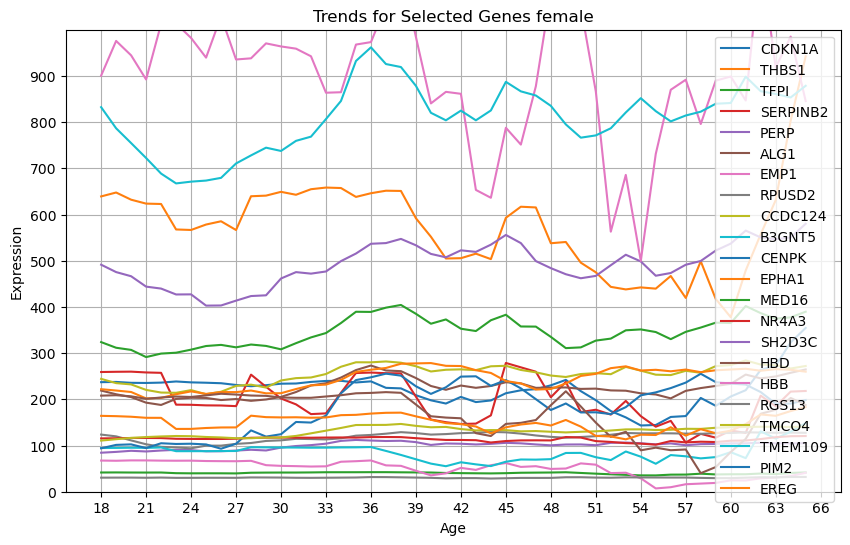

In [89]:
genes_of_interest = ['CDKN1A', 'THBS1', 'TFPI', 'SERPINB2', 'PERP', 'ALG1', 'EMP1', 'RPUSD2', 'CCDC124', 'B3GNT5', 'CENPK', 'EPHA1', 'MED16', 'NR4A3', 'SH2D3C', 'HBD', 'HBB', 'RGS13', 'TMCO4', 'TMEM109', 'PIM2', 'EREG']

plt.figure(figsize=(10, 6))

for gene_name in genes_of_interest:
    subset = mean_window_df[gene_name].sort_index()
    plt.plot(subset.index, subset.values, label=gene_name)

plt.xlabel('Age')
plt.ylabel('Expression')
plt.xticks(np.arange(18, 67, 3))
plt.yticks(np.arange(0, 1000, 100))
plt.ylim(0, 1000)
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Trends for Selected Genes female')

plt.show()


In [78]:
print(df_mean_for_statistics.index)
print(df_mean_for_statistics.index.dtype)

Index(['AAAS', 'ABCB6', 'ABCC5', 'ABCC9', 'ABCE1', 'ABHD12', 'ABHD2', 'ABHD5',
       'ABI1', 'ACAD8',
       ...
       'ZNF683', 'ZNF691', 'ZNF705A', 'ZNF707', 'ZNF713', 'ZNF746', 'ZNF786',
       'ZSCAN29', 'ZWILCH', 'ZZZ3'],
      dtype='object', length=1145)
object


In [82]:
mean_window_df.head()

,AAAS,ABCB6,ABCC5,ABCC9,ABCE1,ABHD12,ABHD2,ABHD5,ABI1,ACAD8,...,ZNF683,ZNF691,ZNF705A,ZNF707,ZNF713,ZNF746,ZNF786,ZSCAN29,ZWILCH,ZZZ3
18,320.583419,86.582644,117.211408,27.782712,294.018415,258.490271,353.027593,175.324305,354.989909,192.797212,...,112.855905,80.093889,17.539660,97.451213,44.430228,429.750152,402.087293,111.763024,94.875771,351.775081
19,308.183068,87.040036,116.092960,27.772449,287.790531,259.116798,352.064705,174.044946,376.182134,190.412559,...,113.347192,78.386308,17.591145,96.690607,44.243256,416.367986,400.424361,110.115584,94.694267,346.532620
20,304.746814,86.739145,115.395781,27.659879,287.333923,252.747168,354.691322,173.614100,392.281709,188.152437,...,112.244835,77.693447,17.642477,95.828889,43.759157,417.439320,396.199101,109.741254,95.777236,351.272054
21,282.872102,84.361599,110.178744,27.290184,260.479555,246.824176,349.464165,171.882163,388.588813,174.107074,...,108.161074,75.029120,17.536703,91.409007,43.112586,411.427898,391.030465,102.775861,94.249852,320.487418
22,278.733371,84.763866,110.995821,27.399543,259.765062,248.716405,355.549387,169.107485,411.385798,174.780008,...,111.276004,74.984202,17.548623,88.998051,43.100561,408.440772,388.768449,103.336090,95.411447,321.866358


In [83]:
df_mean_for_statistics.head()

,18,19,20,21,22,23,24,25,26,27,...,57,58,59,60,61,62,63,64,65,cluster
AAAS,320.583419,308.183068,304.746814,282.872102,278.733371,271.000683,274.151811,275.972596,269.153272,274.838107,...,306.575659,311.043942,321.455849,325.975066,351.173226,341.045898,333.411208,333.920740,338.699290,1
ABCB6,86.582644,87.040036,86.739145,84.361599,84.763866,85.437072,85.267574,85.089268,84.374827,84.618336,...,91.692163,91.797965,92.045234,92.446870,92.474553,92.549991,92.536955,92.642512,92.362804,4
ABCC5,117.211408,116.092960,115.395781,110.178744,110.995821,108.452593,109.061274,110.322881,111.403570,113.546574,...,109.700121,110.595951,115.429128,120.946572,127.564612,125.381482,125.069815,128.245470,128.135478,6
ABCC9,27.782712,27.772449,27.659879,27.290184,27.399543,27.462520,27.420307,27.524043,27.543998,27.481764,...,28.305397,28.288784,28.224998,28.276232,28.299799,28.230058,28.321901,28.368579,28.374246,0
ABCE1,294.018415,287.790531,287.333923,260.479555,259.765062,246.454202,249.005991,250.636711,263.844542,256.606144,...,320.850091,313.941852,328.764426,342.387411,354.112636,347.137990,348.159499,357.919152,352.555355,3
